en iyi modelin hangisi olduğunu bulabilmek için yaygın kullanılan modelleri deniyoruz sonuç çıktılarını
en son değerlendirip o model üstünde geliştirme yapcağız



In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("satılıkpreprocessing.csv", encoding="utf-8-sig")
df.head()

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Isınma Tipi Encoded,Yakıt Tipi Encoded,Yapı Tipi Encoded,Yapının Durumu Encoded,Cephe_Kuzey,Cephe_Güney,Cephe_Doğu,Cephe_Batı,Cephe_Bilinmiyor,Krediye Uygunluk
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6250000,0,Zeytinburnu,Yeşiltepe Mah.,Daire,3,2,3.0,5.0,...,4,1,0,2,0,1,1,0,0,1
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4400000,0,Zeytinburnu,Yeşiltepe Mah.,Daire,3,1,1.0,4.0,...,4,1,0,2,0,0,0,0,1,1
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2699999,0,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,3,1,2.0,4.0,...,4,1,0,1,0,1,0,0,0,1
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5570000,0,Beylikdüzü,Adnan Kahveci Mah.,Daire,4,2,8.0,13.0,...,4,1,0,2,0,1,1,0,0,1
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5044000,0,Beylikdüzü,Barış Mah.,Daire,4,2,3.0,8.0,...,4,1,0,2,0,1,0,0,0,0


In [3]:
X = df.drop(["Şehir", "Link", "İlçe", "Mahalle", "Konut Tipi", "Başlık", "Fiyat",
             "Isınma Tipi", "Yapının Durumu", "Yakıt Tipi", "Yapı Tipi"], axis=1)

y = df["Fiyat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 144)

burdan sonra her modeli tuned edip hata istatistiklerini karşılaştıracağız

---KNN---

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, r2_score, max_error
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 2. Train-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=144)

# 3. Değerlendirme fonksiyonu
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metrics = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": mean_squared_error(y_train, y_pred_train, squared=False),
        "Test RMSE": mean_squared_error(y_test, y_pred_test, squared=False),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_test) * 100,
        "Median AE": median_absolute_error(y_test, y_pred_test),
        "Explained Variance (Test)": r2_score(y_test, y_pred_test),
        "Train R² Score": r2_score(y_train, y_pred_train),
        "Test R² Score": r2_score(y_test, y_pred_test),
        "Max Error": max_error(y_test, y_pred_test)
    }
    return metrics

# 4. Pipeline: StandardScaler + KNN
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_jobs=1))
])

# 5. GridSearch parametreleri
knn_params = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17],
    "knn__weights": ["uniform"],
    "knn__metric": ["euclidean"]
}

# 6. GridSearchCV ile hiperparametre optimizasyonu
grid_knn = GridSearchCV(pipeline, knn_params, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_knn.fit(X_train, y_train)

# 7. En iyi model ile değerlendirme
print("🔍 En iyi parametreler:", grid_knn.best_params_)
best_knn_model = grid_knn.best_estimator_

# 8. Değerlendirme metrikleri
knn_metrics = evaluate_model(best_knn_model, X_train, X_test, y_train, y_test)

# 9. Metrikleri yazdır
print("\n📊 KNN Model Performansı (Scaled & Optimized)")
for k, v in knn_metrics.items():
    print(f"{k}: {v:,.2f}")


🔍 En iyi parametreler: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}


  File "C:\Users\bedir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\bedir\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bedir\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\bedir\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



📊 KNN Model Performansı (Scaled & Optimized)
Train MAE: 2,239,764.98
Test MAE: 2,645,456.96
Train RMSE: 3,499,531.01
Test RMSE: 4,222,864.85
MAPE: 46.07
Median AE: 1,535,714.29
Explained Variance (Test): 0.64
Train R² Score: 0.74
Test R² Score: 0.64
Max Error: 32,293,571.43


------Random Forest--------

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Model tanımı
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# 2. Hiperparametre aralığı
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}

# 3. GridSearchCV
grid_rf = GridSearchCV(rf_model, rf_params, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

# 4. En iyi model
print("🔍 En iyi parametreler:", grid_rf.best_params_)
best_rf_model = grid_rf.best_estimator_

# 5. Değerlendirme
rf_metrics = evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

# 6. Sonuçları yazdır
print("\n📊 Random Forest Model Performansı")
for k, v in rf_metrics.items():
    print(f"{k}: {v:,.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔍 En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📊 Random Forest Model Performansı
Train MAE: 665,076.30
Test MAE: 1,792,419.98
Train RMSE: 1,114,507.76
Test RMSE: 3,013,375.97
MAPE: 32.01
Median AE: 983,940.00
Explained Variance (Test): 0.82
Train R² Score: 0.97
Test R² Score: 0.82
Max Error: 28,527,075.00


In [ ]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

Gradient Boosting Machines

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Model tanımı
gbr = GradientBoostingRegressor(random_state=42)

# 2. Hiperparametre dağılımı
gbr_params = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.8, 1],
    "max_features": ["auto", "sqrt", "log2"]
}

# 3. RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=gbr_params,
    n_iter=50,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Eğitim
random_search_gbr.fit(X_train, y_train)

# 5. En iyi model ve değerlendirme
print("🔍 En iyi parametreler:", random_search_gbr.best_params_)
best_gbr_model = random_search_gbr.best_estimator_

gbr_metrics = evaluate_model(best_gbr_model, X_train, X_test, y_train, y_test)

# 6. Sonuçları yazdır
print("\n📊 Gradient Boosting Regressor Performansı")
for k, v in gbr_metrics.items():
    print(f"{k}: {v:,.2f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
🔍 En iyi parametreler: {'subsample': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1}

📊 Gradient Boosting Regressor Performansı
Train MAE: 801,569.49
Test MAE: 1,629,255.48
Train RMSE: 1,209,442.14
Test RMSE: 2,784,460.42
MAPE: 26.93
Median AE: 877,851.43
Explained Variance (Test): 0.84
Train R² Score: 0.97
Test R² Score: 0.84
Max Error: 24,723,200.71


In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

XGBoost

In [14]:
!pip install xgboost

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# 1. Model tanımı
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# 2. Hiperparametre dağılımı
xgb_params = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1],
    "colsample_bytree": [0.6, 0.8, 1],
    "gamma": [0, 1, 5],
    "reg_alpha": [0.1, 1],
    "reg_lambda": [1, 3, 5]
}

# 3. RandomizedSearchCV (n_iter ile kombinasyon sayısını sınırla)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=100,  # toplam 50 rastgele kombinasyon dener (değeri artırabilirsin)
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Eğitim
random_search.fit(X_train, y_train)

# 5. En iyi model
print("🔍 En iyi parametreler:", random_search.best_params_)
best_xgb_model = random_search.best_estimator_

# 6. Değerlendirme
xgb_metrics = evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)

# 7. Yazdır
print("\n📊 XGBoost Model Performansı")
for k, v in xgb_metrics.items():
    print(f"{k}: {v:,.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
🔍 En iyi parametreler: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}

📊 XGBoost Model Performansı
Train MAE: 671,521.02
Test MAE: 1,563,653.08
Train RMSE: 971,707.90
Test RMSE: 2,697,231.12
MAPE: 26.11
Median AE: 839,438.75
Explained Variance (Test): 0.85
Train R² Score: 0.98
Test R² Score: 0.85
Max Error: 26,033,181.50


Light GBM

In [17]:
!pip install lightgbm

In [18]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Model tanımı
lgbm_model = LGBMRegressor(objective="regression", random_state=42, n_jobs=-1)

# 2. Hiperparametre aralığı
lgbm_params = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7, -1],  # -1: sınırsız derinlik
    "num_leaves": [15, 31, 50, 70],
    "min_child_samples": [5, 10, 20],
    "subsample": [0.6, 0.8, 1],
    "colsample_bytree": [0.6, 0.8, 1],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 3, 5]
}

# 3. RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=lgbm_params,
    n_iter=200,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Eğitim
random_search_lgbm.fit(X_train, y_train)

# 5. En iyi model ve değerlendirme
print("🔍 En iyi parametreler:", random_search_lgbm.best_params_)
best_lgbm_model = random_search_lgbm.best_estimator_

lgbm_metrics = evaluate_model(best_lgbm_model, X_train, X_test, y_train, y_test)

# 6. Sonuçları yazdır
print("\n📊 LightGBM Model Performansı")
for k, v in lgbm_metrics.items():
    print(f"{k}: {v:,.2f}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 17227, number of used features: 21
[LightGBM] [Info] Start training from score 8249613.179486
🔍 En iyi parametreler: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.1, 'num_leaves': 70, 'n_estimators': 500, 'min_child_samples': 5, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.

modelleri kıyaslama bölümü

In [ ]:
import seaborn as sns
modeller = [
    knn_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned
    
]

for model in modeller:
    isimler = model.__class__.__name__
    
    dogruluk = model.score(X_test,y_test)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

modeller = [knn_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned]  

sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__  # Modelin ismi
    dogruluk = model.score(X_test, y_test)  # Modelin doğruluğu
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns=["Modeller", "Accuracy"])  # Yeni satır
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)  # `append` yerine `concat`

# Sonuçları görselleştirme
sns.barplot(x='Accuracy', y='Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları')
plt.show()

In [ ]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
pip install CatBoost

In [19]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Model tanımı (sessiz modda)
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# 2. Hiperparametre aralığı
cat_params = {
    "iterations": [300, 500, 700],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 10],
    "subsample": [0.6, 0.8, 1]
}

# 3. RandomizedSearchCV
random_search_cat = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Eğitim
random_search_cat.fit(X_train, y_train)

# 5. En iyi model
print("🔍 En iyi parametreler:", random_search_cat.best_params_)
best_cat_model = random_search_cat.best_estimator_

# 6. Değerlendirme
cat_metrics = evaluate_model(best_cat_model, X_train, X_test, y_train, y_test)

# 7. Sonuçları yazdır
print("\n📊 CatBoost Model Performansı")
for k, v in cat_metrics.items():
    print(f"{k}: {v:,.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 En iyi parametreler: {'subsample': 0.6, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 700, 'depth': 6}

📊 CatBoost Model Performansı
Train MAE: 1,353,604.03
Test MAE: 1,699,133.96
Train RMSE: 2,062,305.79
Test RMSE: 2,809,051.46
MAPE: 28.98
Median AE: 961,606.05
Explained Variance (Test): 0.84
Train R² Score: 0.91
Test R² Score: 0.84
Max Error: 24,894,769.04


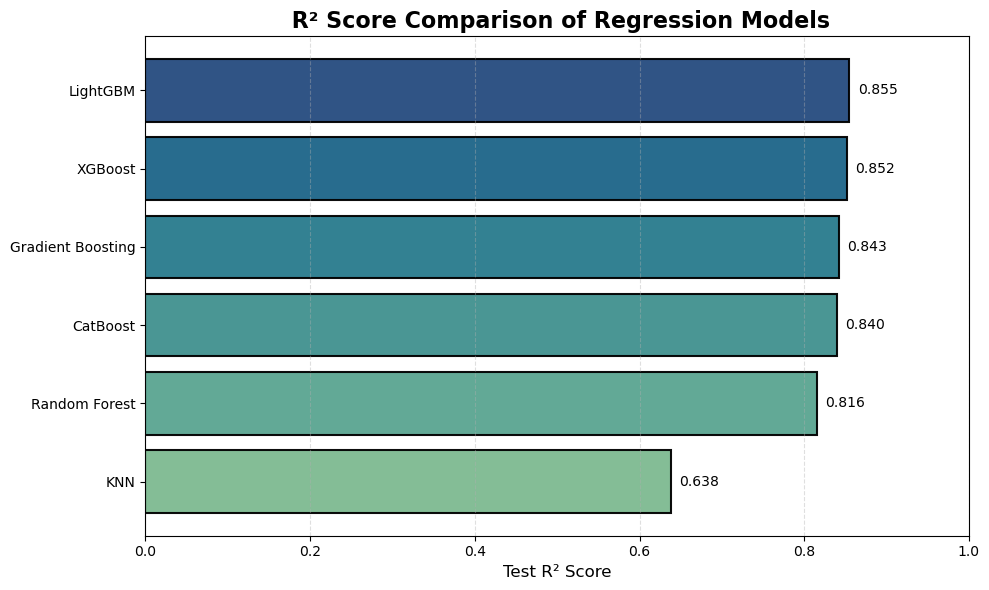

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# R² skorları
r2_scores = {
    "KNN": knn_metrics["Test R² Score"],
    "Random Forest": rf_metrics["Test R² Score"],
    "Gradient Boosting": gbr_metrics["Test R² Score"],
    "XGBoost": xgb_metrics["Test R² Score"],
    "LightGBM": lgbm_metrics["Test R² Score"],
    "CatBoost": cat_metrics["Test R² Score"]
}

# DataFrame
r2_df = pd.DataFrame(list(r2_scores.items()), columns=["Model", "R² Score"])
r2_df = r2_df.sort_values(by="R² Score", ascending=True)

# Renk paleti (şık bir görünüm için)
colors = sns.color_palette("crest", len(r2_df))

# Grafik
plt.figure(figsize=(10, 6))
bars = plt.barh(r2_df["Model"], r2_df["R² Score"], color=colors, edgecolor="black")

# Çubuk stilleri
for bar in bars:
    bar.set_linewidth(1.5)
    bar.set_alpha(0.95)

# Başlık ve eksenler
plt.title(" R² Score Comparison of Regression Models", fontsize=16, weight="bold")
plt.xlabel("Test R² Score", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Değer etiketleri
for i, (val, name) in enumerate(zip(r2_df["R² Score"], r2_df["Model"])):
    plt.text(val + 0.01, i, f"{val:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


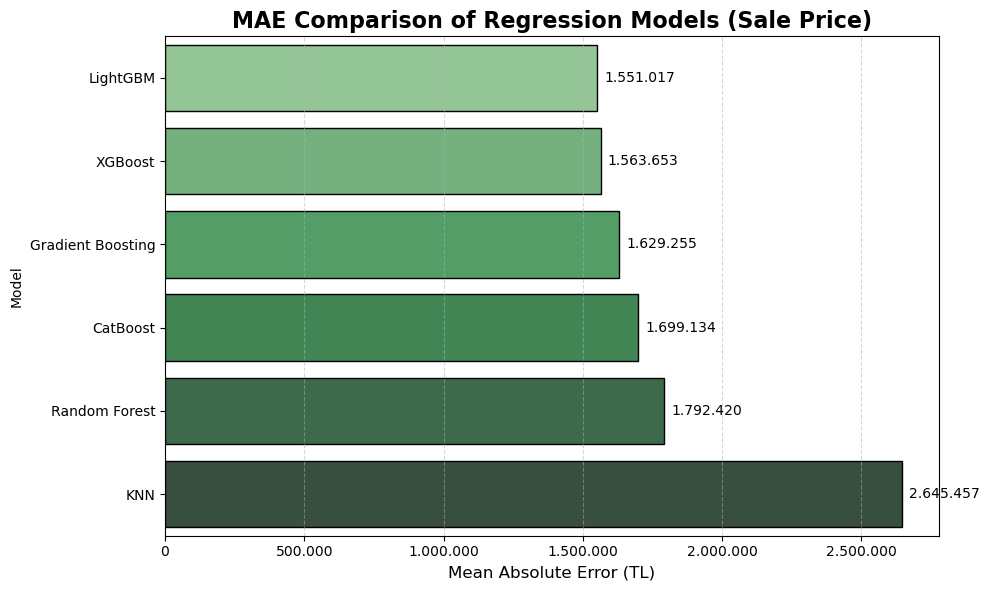

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# MAE skorları
mae_scores = {
    "KNN": knn_metrics["Test MAE"],
    "Random Forest": rf_metrics["Test MAE"],
    "Gradient Boosting": gbr_metrics["Test MAE"],
    "XGBoost": xgb_metrics["Test MAE"],
    "LightGBM": lgbm_metrics["Test MAE"],
    "CatBoost": cat_metrics["Test MAE"]
}

# DataFrame
mae_df = pd.DataFrame(list(mae_scores.items()), columns=["Model", "MAE"])
mae_df = mae_df.sort_values(by="MAE", ascending=True)

# Renkler
colors = sns.color_palette("Greens_d", len(mae_df))

# Grafik
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=mae_df, x="MAE", y="Model", palette=colors, edgecolor="black")

# Başlık ve eksenler
plt.title("MAE Comparison of Regression Models (Sale Price)", fontsize=16, weight="bold")
plt.xlabel("Mean Absolute Error (TL)", fontsize=12)
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# TL biçimi
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Değer etiketleri
for i, (val, name) in enumerate(zip(mae_df["MAE"], mae_df["Model"])):
    plt.text(val + max(mae_df["MAE"]) * 0.01, i, f"{val:,.0f}".replace(",", "."), va='center', fontsize=10)

plt.tight_layout()
plt.show()


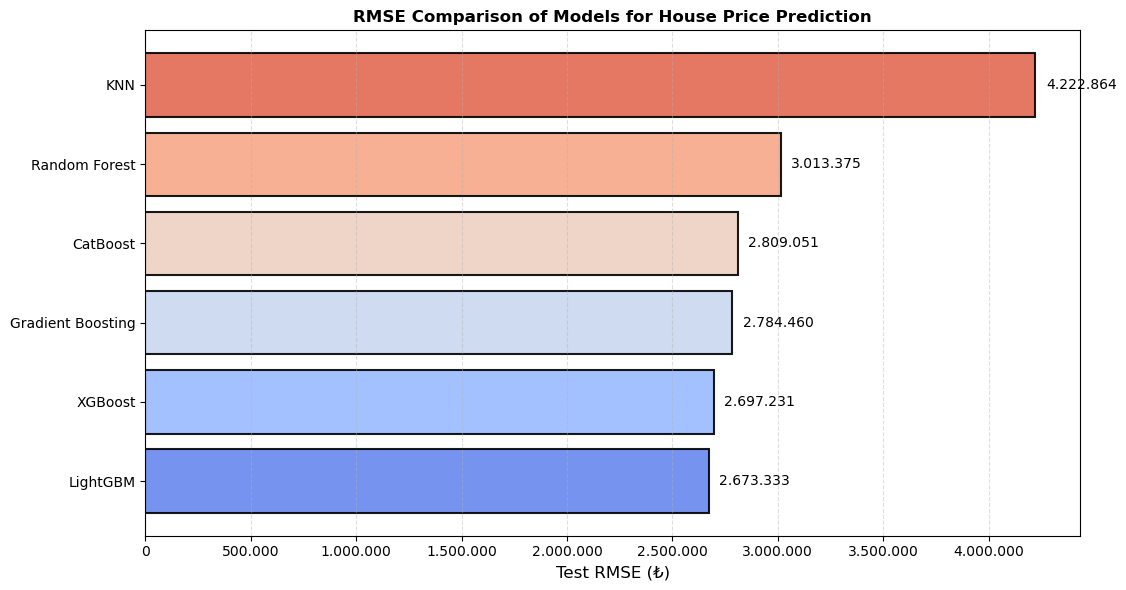

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# 1. RMSE scores
rmse_scores = {
    "KNN": knn_metrics["Test RMSE"],
    "Random Forest": rf_metrics["Test RMSE"],
    "Gradient Boosting": gbr_metrics["Test RMSE"],
    "XGBoost": xgb_metrics["Test RMSE"],
    "LightGBM": lgbm_metrics["Test RMSE"],
    "CatBoost": cat_metrics["Test RMSE"]
}

# 2. Convert to DataFrame and sort
rmse_df = pd.DataFrame(list(rmse_scores.items()), columns=["Model", "Test RMSE"])
rmse_df = rmse_df.sort_values(by="Test RMSE", ascending=True)

# 3. Gradient color palette
colors = sns.color_palette("coolwarm", len(rmse_df))

# 4. Plot
plt.figure(figsize=(11, 6))
bars = plt.barh(rmse_df["Model"], rmse_df["Test RMSE"], color=colors, edgecolor="black")

# 5. Add style to bars
for bar in bars:
    bar.set_linewidth(1.5)
    bar.set_alpha(0.9)

# 6. Title and formatting
plt.title("RMSE Comparison of Models for House Price Prediction", fontsize=12, weight="bold")
plt.xlabel("Test RMSE (₺)", fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", ".")))
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()

# 7. Value annotations
for i, (val, name) in enumerate(zip(rmse_df["Test RMSE"], rmse_df["Model"])):
    plt.text(val + 50000, i, f"{int(val):,}".replace(",", "."), va='center', fontsize=10)

plt.show()


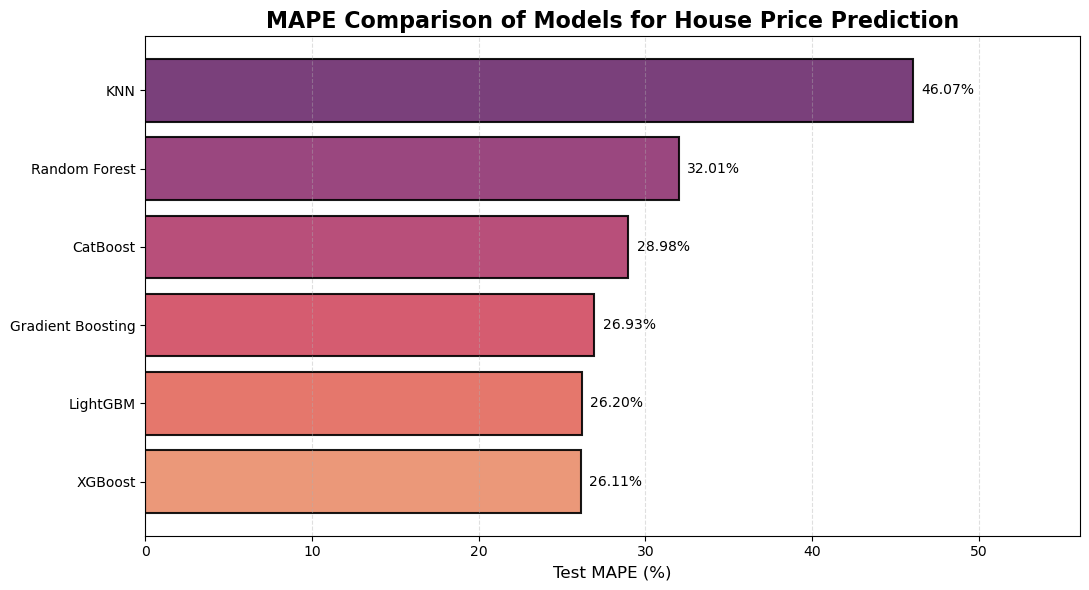

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# 1. MAPE scores
mape_scores = {
    "KNN": knn_metrics["MAPE"],
    "Random Forest": rf_metrics["MAPE"],
    "Gradient Boosting": gbr_metrics["MAPE"],
    "XGBoost": xgb_metrics["MAPE"],
    "LightGBM": lgbm_metrics["MAPE"],
    "CatBoost": cat_metrics["MAPE"]
}

# 2. Convert to DataFrame and sort
mape_df = pd.DataFrame(list(mape_scores.items()), columns=["Model", "Test MAPE"])
mape_df = mape_df.sort_values(by="Test MAPE", ascending=True)

# 3. Set custom color palette
colors = sns.color_palette("flare", len(mape_df))

# 4. Plotting
plt.figure(figsize=(11, 6))
bars = plt.barh(mape_df["Model"], mape_df["Test MAPE"], color=colors, edgecolor="black")

# 5. Bar styling
for bar in bars:
    bar.set_linewidth(1.5)
    bar.set_alpha(0.9)

# 6. Title and format
plt.title("MAPE Comparison of Models for House Price Prediction", fontsize=16, weight="bold")
plt.xlabel("Test MAPE (%)", fontsize=12)
plt.xlim(0, max(mape_df["Test MAPE"]) + 10)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()

# 7. Annotate values
for i, (val, name) in enumerate(zip(mape_df["Test MAPE"], mape_df["Model"])):
    plt.text(val + 0.5, i, f"{val:.2f}%", va='center', fontsize=10)

plt.show()


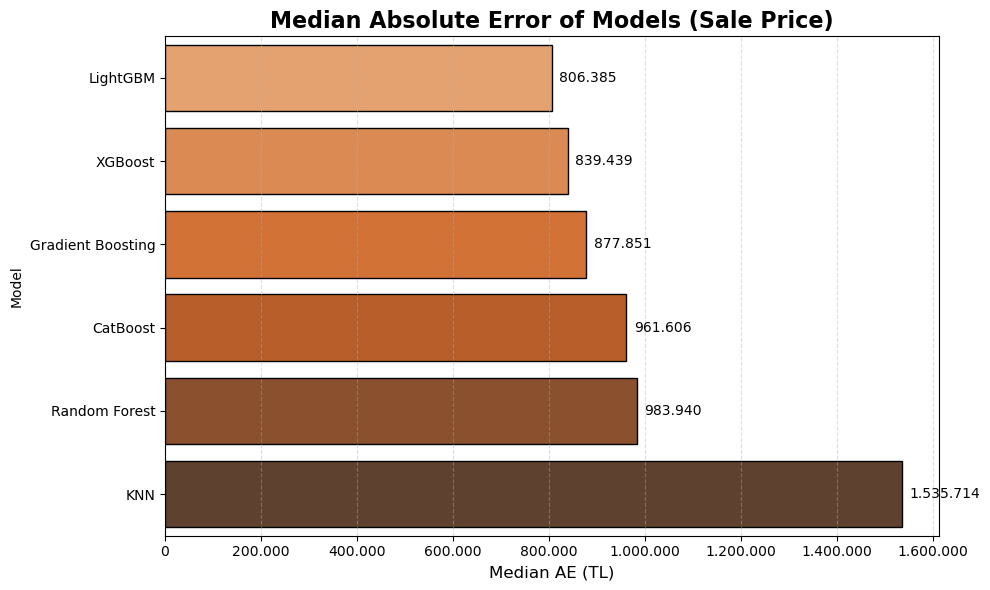

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# Median AE skorları
median_scores = {
    "KNN": knn_metrics["Median AE"],
    "Random Forest": rf_metrics["Median AE"],
    "Gradient Boosting": gbr_metrics["Median AE"],
    "XGBoost": xgb_metrics["Median AE"],
    "LightGBM": lgbm_metrics["Median AE"],
    "CatBoost": cat_metrics["Median AE"]
}

# DataFrame
median_df = pd.DataFrame(list(median_scores.items()), columns=["Model", "Median AE"])
median_df = median_df.sort_values(by="Median AE", ascending=True)

# Renk paleti
colors = sns.color_palette("Oranges_d", len(median_df))

# Grafik
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=median_df, x="Median AE", y="Model", palette=colors, edgecolor="black")

# Başlık ve etiketler
plt.title("Median Absolute Error of Models (Sale Price)", fontsize=16, weight="bold")
plt.xlabel("Median AE (TL)", fontsize=12)
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# TL formatı
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Değer etiketleri
for i, (val, name) in enumerate(zip(median_df["Median AE"], median_df["Model"])):
    plt.text(val + max(median_df["Median AE"]) * 0.01, i, f"{val:,.0f}".replace(",", "."), va='center', fontsize=10)

plt.tight_layout()
plt.show()


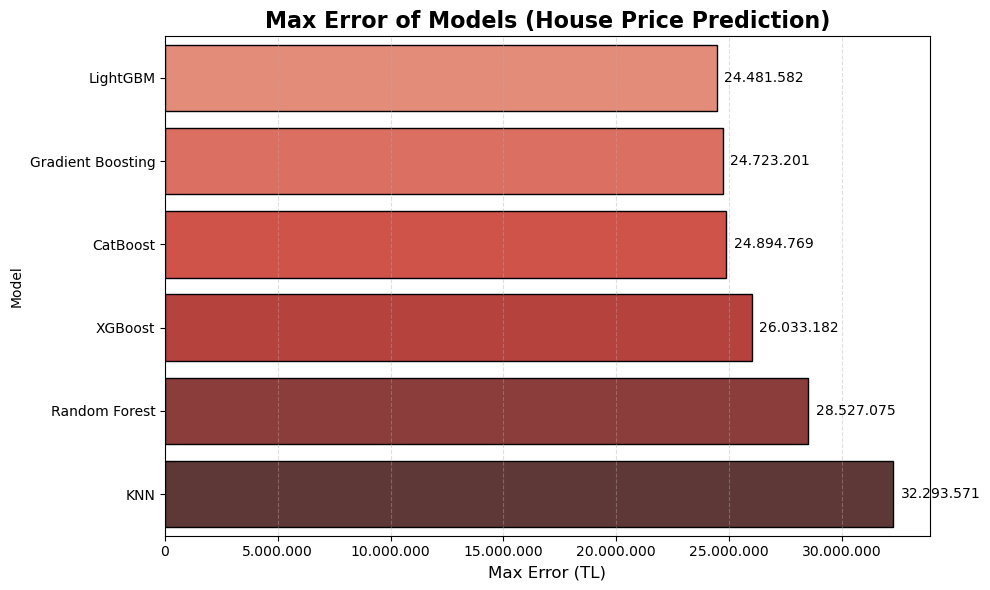

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# Max Error değerleri
max_error_scores = {
    "KNN": knn_metrics["Max Error"],
    "Random Forest": rf_metrics["Max Error"],
    "Gradient Boosting": gbr_metrics["Max Error"],
    "XGBoost": xgb_metrics["Max Error"],
    "LightGBM": lgbm_metrics["Max Error"],
    "CatBoost": cat_metrics["Max Error"]
}

# DataFrame oluştur
max_df = pd.DataFrame(list(max_error_scores.items()), columns=["Model", "Max Error"])
max_df = max_df.sort_values(by="Max Error", ascending=True)

# Renk skalası
colors = sns.color_palette("Reds_d", len(max_df))

# Grafik çizimi
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=max_df, x="Max Error", y="Model", palette=colors, edgecolor="black")

# Başlık ve eksen etiketleri
plt.title("Max Error of Models (House Price Prediction)", fontsize=16, weight="bold")
plt.xlabel("Max Error (TL)", fontsize=12)
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# TL biçimlendirme
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Her bara değer yaz
for i, (val, name) in enumerate(zip(max_df["Max Error"], max_df["Model"])):
    plt.text(val + max(max_df["Max Error"]) * 0.01, i, f"{val:,.0f}".replace(",", "."), va='center', fontsize=10)

plt.tight_layout()
plt.show()


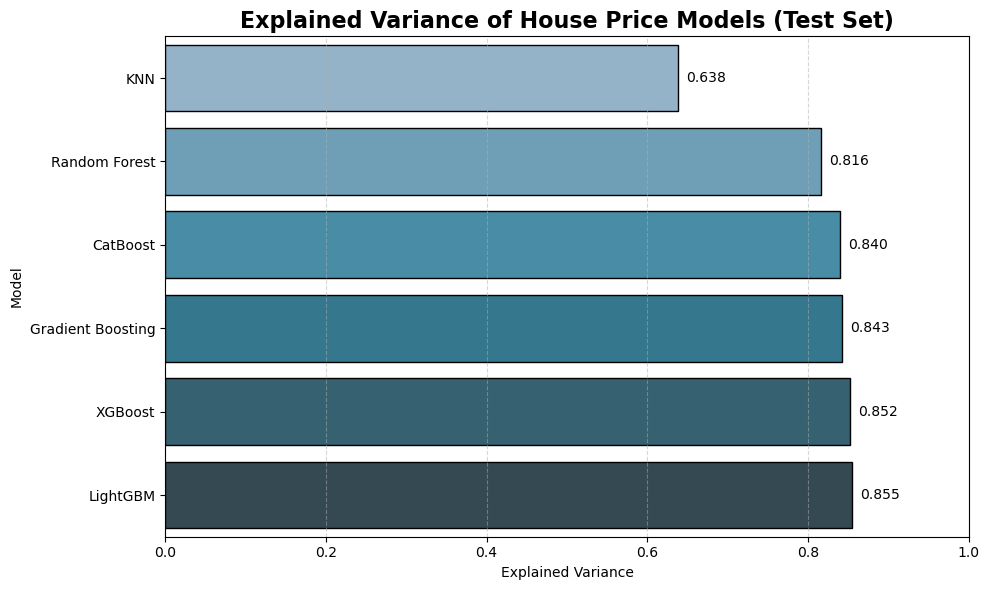

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Explained Variance skorları
explained_var_scores = {
    "KNN": knn_metrics["Explained Variance (Test)"],
    "Random Forest": rf_metrics["Explained Variance (Test)"],
    "Gradient Boosting": gbr_metrics["Explained Variance (Test)"],
    "XGBoost": xgb_metrics["Explained Variance (Test)"],
    "LightGBM": lgbm_metrics["Explained Variance (Test)"],
    "CatBoost": cat_metrics["Explained Variance (Test)"]
}

# DataFrame oluştur
ev_df = pd.DataFrame(list(explained_var_scores.items()), columns=["Model", "Explained Variance"])
ev_df = ev_df.sort_values(by="Explained Variance", ascending=True)

# Grafik
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=ev_df, x="Explained Variance", y="Model", palette="PuBuGn_d", edgecolor="black")

# Başlık ve eksenler
plt.title("Explained Variance of House Price Models (Test Set)", fontsize=16, weight="bold")
plt.xlabel("Explained Variance")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# X ekseni sınırları
plt.xlim(0, 1)

# Barların üzerine değer etiketleri
for i, (val, name) in enumerate(zip(ev_df["Explained Variance"], ev_df["Model"])):
    plt.text(val + 0.01, i, f"{val:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


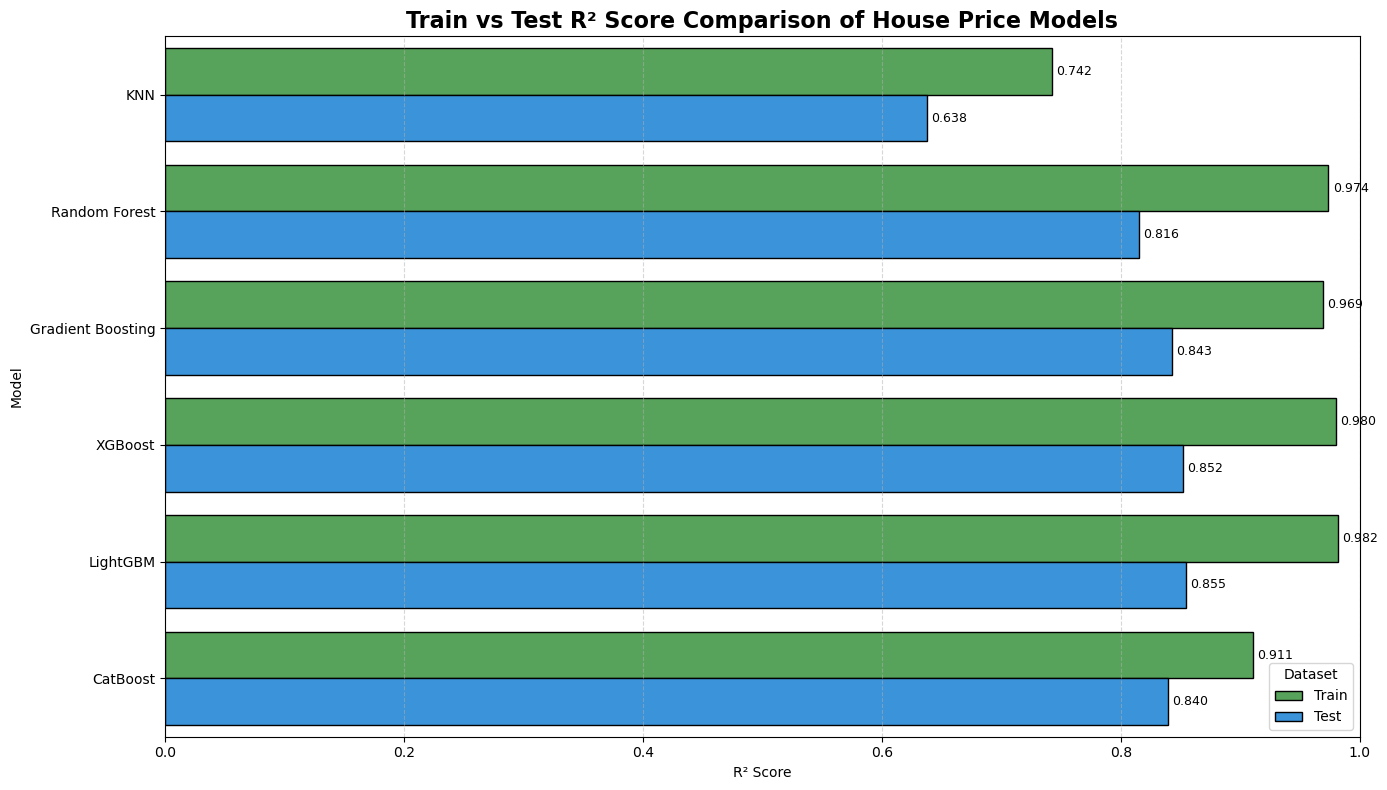

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# R² skorlarını iki ayrı liste halinde topla
models = ["KNN", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"]
train_r2 = [
    knn_metrics["Train R² Score"],
    rf_metrics["Train R² Score"],
    gbr_metrics["Train R² Score"],
    xgb_metrics["Train R² Score"],
    lgbm_metrics["Train R² Score"],
    cat_metrics["Train R² Score"]
]
test_r2 = [
    knn_metrics["Test R² Score"],
    rf_metrics["Test R² Score"],
    gbr_metrics["Test R² Score"],
    xgb_metrics["Test R² Score"],
    lgbm_metrics["Test R² Score"],
    cat_metrics["Test R² Score"]
]

# DataFrame
r2_compare_df = pd.DataFrame({
    "Model": models * 2,
    "R² Score": train_r2 + test_r2,
    "Dataset": ["Train"] * len(models) + ["Test"] * len(models)
})

# Grafik
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=r2_compare_df, x="R² Score", y="Model", hue="Dataset", palette=["#4caf50", "#2196f3"], edgecolor="black")

# Başlık ve biçimlendirme
plt.title("Train vs Test R² Score Comparison of House Price Models", fontsize=16, weight="bold")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Değer etiketleri
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', label_type='edge', padding=3, fontsize=9)

plt.legend(title="Dataset", loc="lower right")
plt.tight_layout()
plt.show()


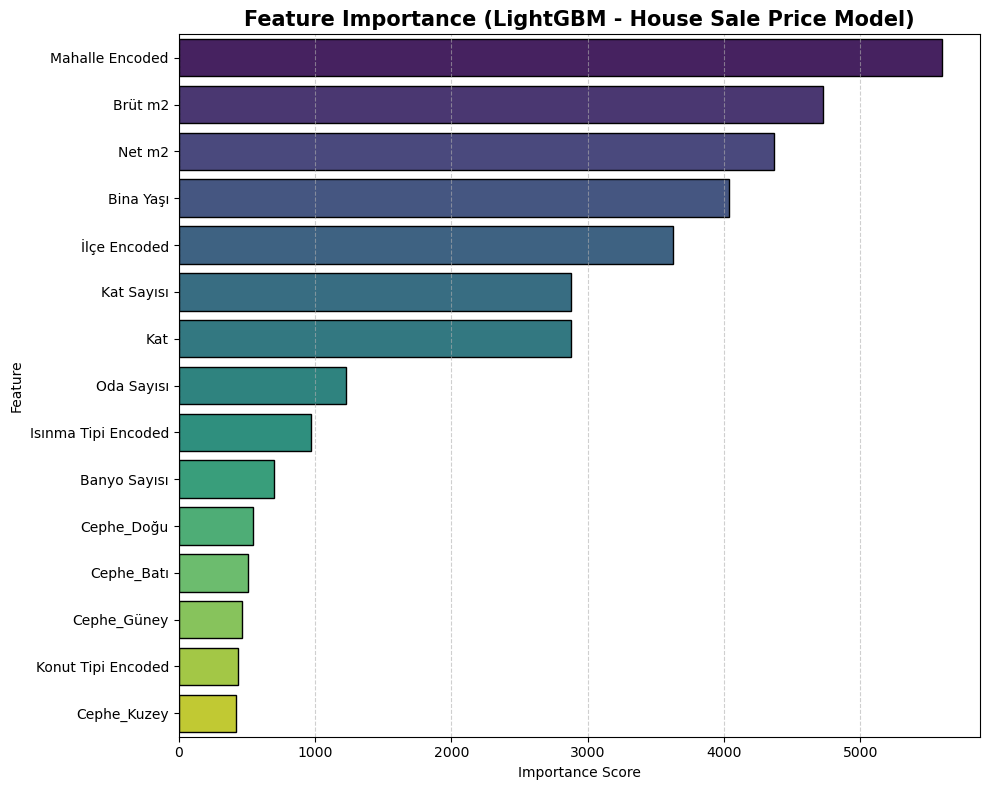

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellik isimleri ve önem değerleri
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_lgbm_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances.head(15), x="Importance", y="Feature", palette="viridis", edgecolor="black")

plt.title("Feature Importance (LightGBM - House Sale Price Model)", fontsize=15, weight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


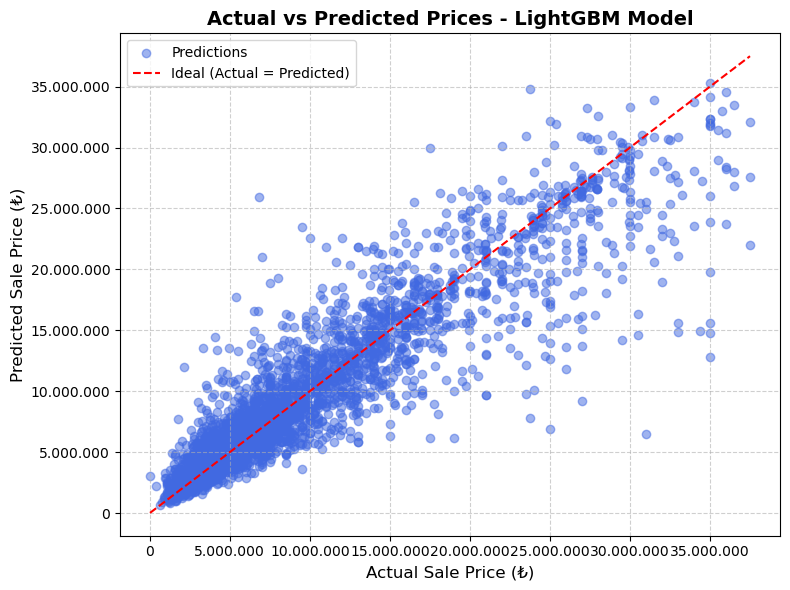

In [153]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_lgbm_model.predict(X_test), alpha=0.5, color="royalblue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal (Actual = Predicted)")

plt.xlabel("Actual Sale Price (₺)", fontsize=12)
plt.ylabel("Predicted Sale Price (₺)", fontsize=12)
plt.title("Actual vs Predicted Prices - LightGBM Model", fontsize=14, weight="bold")
plt.legend()

# Binlik ayırıcılar
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("satılık_actualpredicted.png", dpi=300)
plt.show()



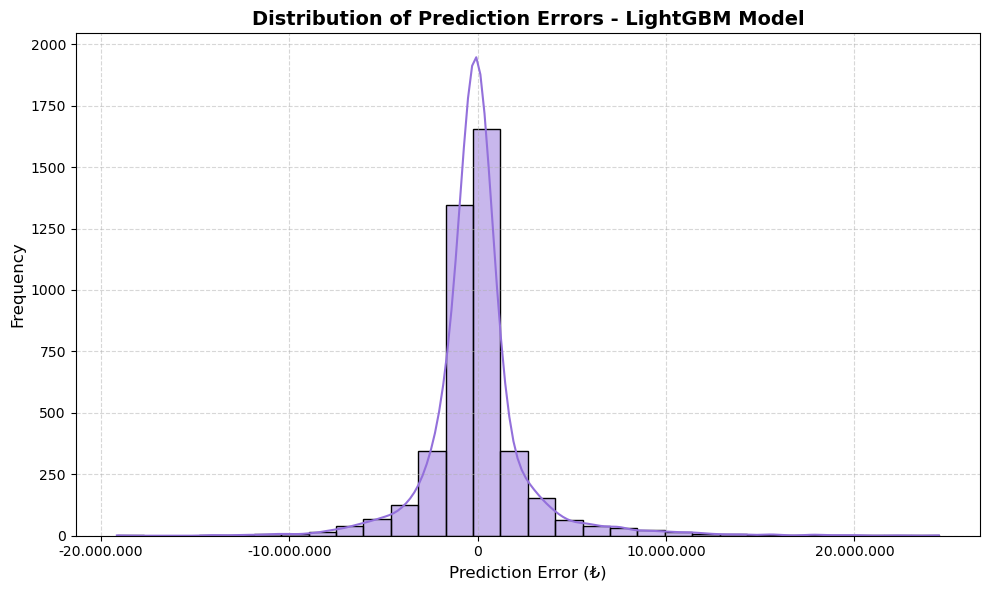

In [155]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Residual hesapla
residuals = y_test - best_lgbm_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="mediumpurple")

plt.title("Distribution of Prediction Errors - LightGBM Model", fontsize=14, weight="bold")
plt.xlabel("Prediction Error (₺)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# TL formatı
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("residual_distribution_lightgbm.png", dpi=300)
plt.show()


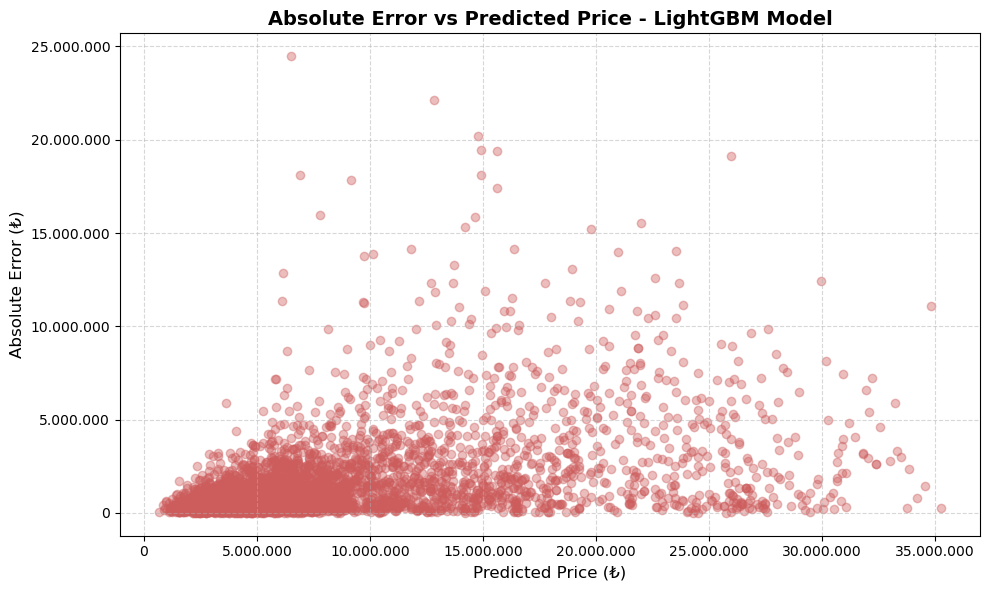

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Tahmin ve hata verisi
y_pred = best_lgbm_model.predict(X_test)
absolute_errors = np.abs(y_test - y_pred)

# Grafik
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, absolute_errors, alpha=0.4, color="indianred")
plt.title("Absolute Error vs Predicted Price - LightGBM Model", fontsize=14, weight="bold")
plt.xlabel("Predicted Price (₺)", fontsize=12)
plt.ylabel("Absolute Error (₺)", fontsize=12)

# TL biçimi
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("absolute_error_vs_predicted_lightgbm.png", dpi=300)
plt.show()


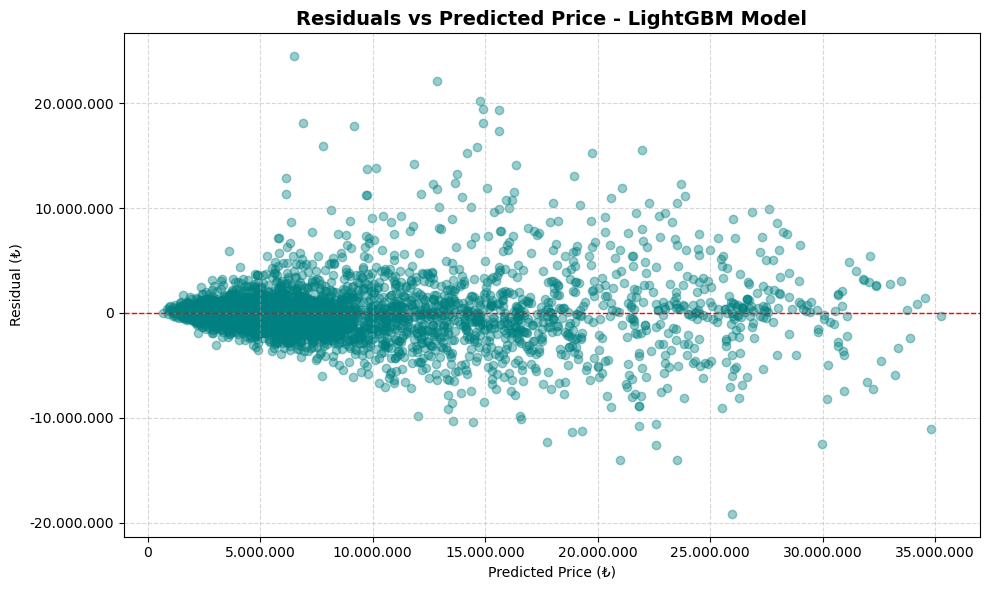

In [159]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.4, color="teal")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Residuals vs Predicted Price - LightGBM Model", fontsize=14, weight="bold")
plt.xlabel("Predicted Price (₺)")
plt.ylabel("Residual (₺)")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("residuals_vs_predicted_lightgbm.png", dpi=300)
plt.show()


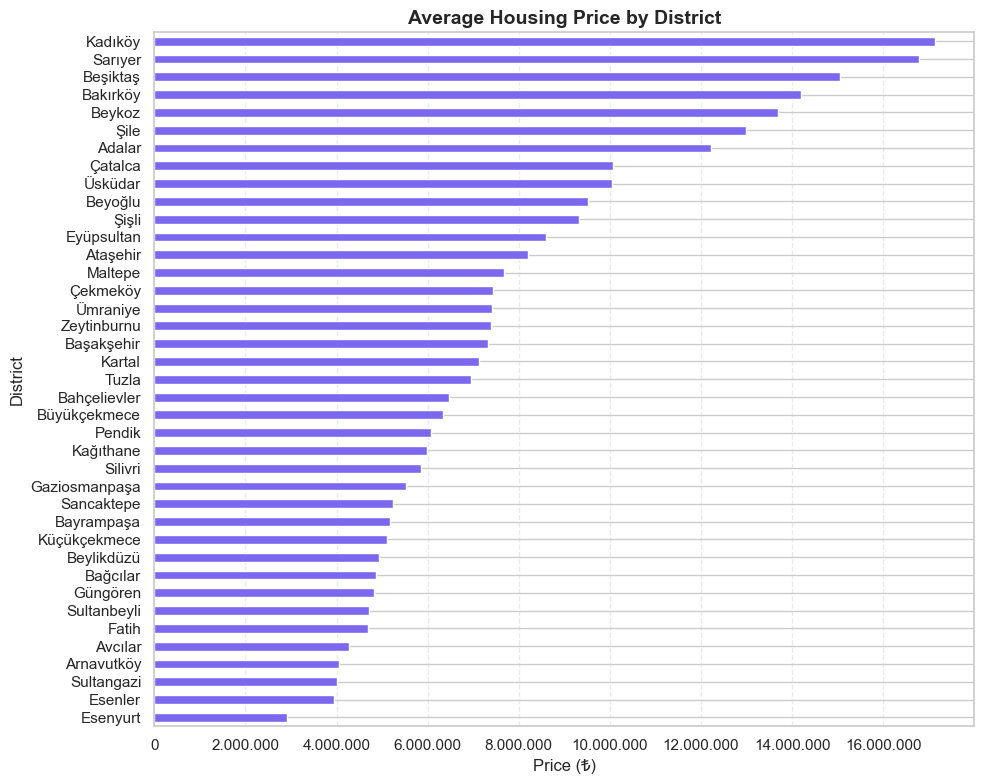

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# İlçe bazında ortalama fiyatları al
district_avg = df.groupby("İlçe")["Fiyat"].mean().sort_values()

# İngilizceye çevirmek istersen (isteğe bağlı sözlükle çeviri yapılabilir)

# Grafik oluştur
plt.figure(figsize=(10, 8))
district_avg.plot(kind="barh", color="mediumslateblue")

# Başlık ve eksen etiketleri (İngilizce)
plt.title("Average Housing Price by District", fontsize=14, weight="bold")
plt.xlabel("Price (₺)", fontsize=12)
plt.ylabel("District", fontsize=12)

# Yatay eksende ₺ cinsinden düzgün biçimlendirme
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", ".")))

# Izgara ve sıkı yerleşim
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_21048\1479497787.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_avg.index, y=type_avg.values, palette="viridis")


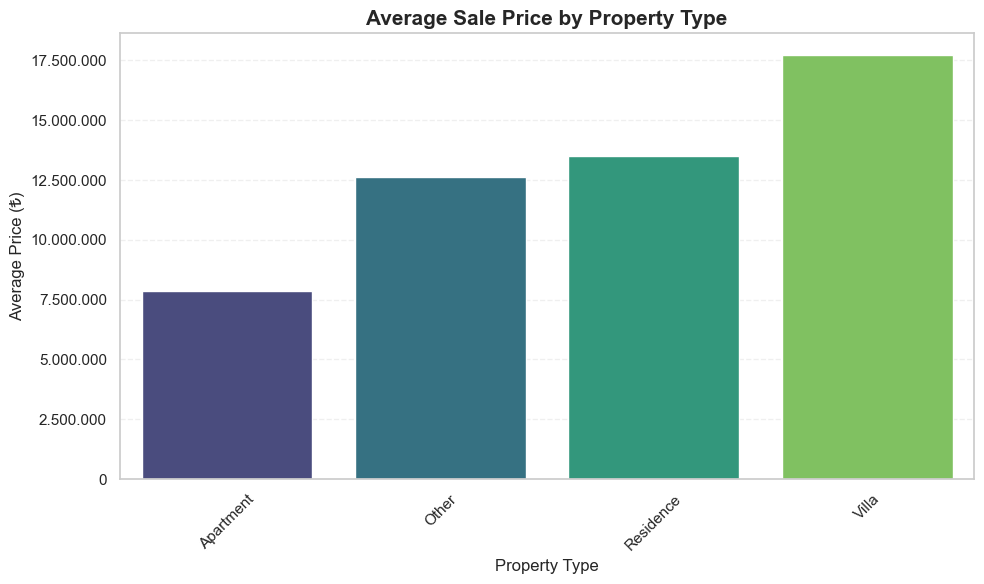

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

# 💡 Ortalama fiyatları al (satılık için)
type_avg = df.groupby("Konut Tipi")["Fiyat"].mean().sort_values()

# 📌 Konut tipi İngilizce'ye çevrilsin
mapping = {
    "Daire": "Apartment",
    "Villa": "Villa",
    "Residence": "Residence",
    "Diğer": "Other"
}
type_avg.index = [mapping.get(k, k) for k in type_avg.index]

# 🎨 Grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=type_avg.index, y=type_avg.values, palette="viridis")

# 🏷 Başlık ve etiketler
plt.title("Average Sale Price by Property Type", fontsize=15, weight="bold")
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Average Price (₺)", fontsize=12)

# 💰 Para biçimi (noktalı, milyonlar düzgün görünsün)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", ".")))

# 🌟 Stil ayarı
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



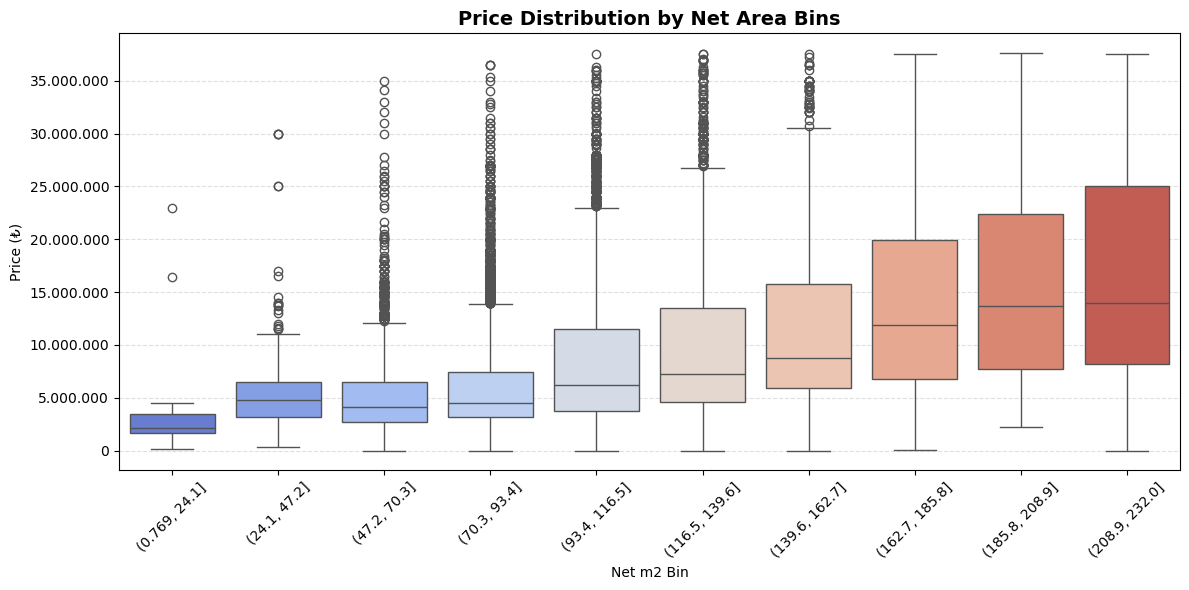

In [169]:
df['Net m2 Bin'] = pd.cut(df['Net m2'], bins=10)

plt.figure(figsize=(12, 6))
import seaborn as sns
sns.boxplot(x="Net m2 Bin", y="Fiyat", data=df, palette="coolwarm")
plt.title("Price Distribution by Net Area Bins", fontsize=14, weight="bold")
plt.ylabel("Price (₺)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", ".")))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_21048\2442008301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Number of Rooms", y="Price", data=df, palette="pastel")


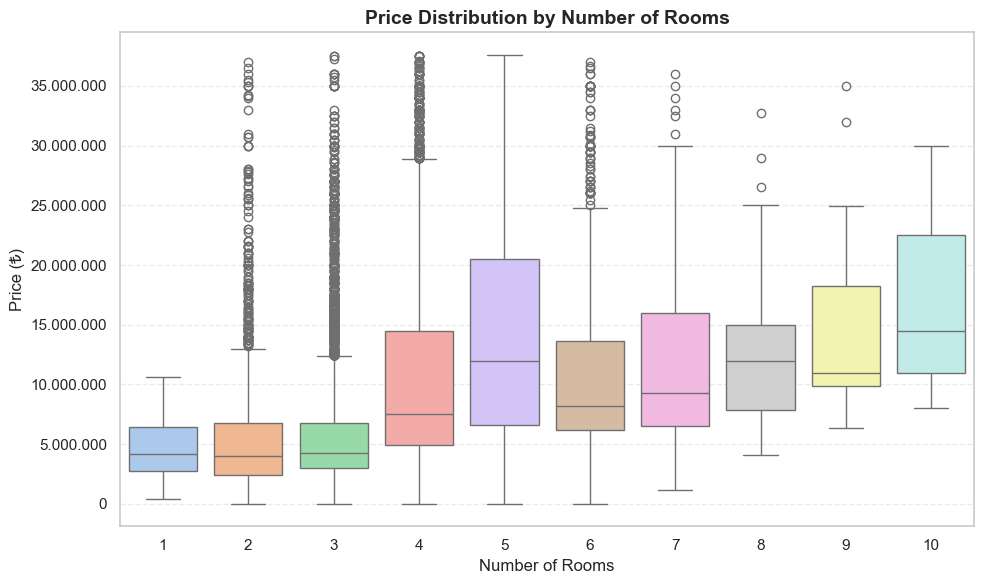

In [35]:
df["Price"] = df["Fiyat"]
df["Number of Rooms"] = df["Oda Sayısı"]

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.boxplot(x="Number of Rooms", y="Price", data=df, palette="pastel")

plt.title("Price Distribution by Number of Rooms", fontsize=14, weight="bold")
plt.xlabel("Number of Rooms")
plt.ylabel("Price (₺)")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", ".")))

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()




C:\Users\bedir\AppData\Local\Temp\ipykernel_21048\2819993630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Building Age Bin", y="Fiyat", data=df, palette="YlGnBu")


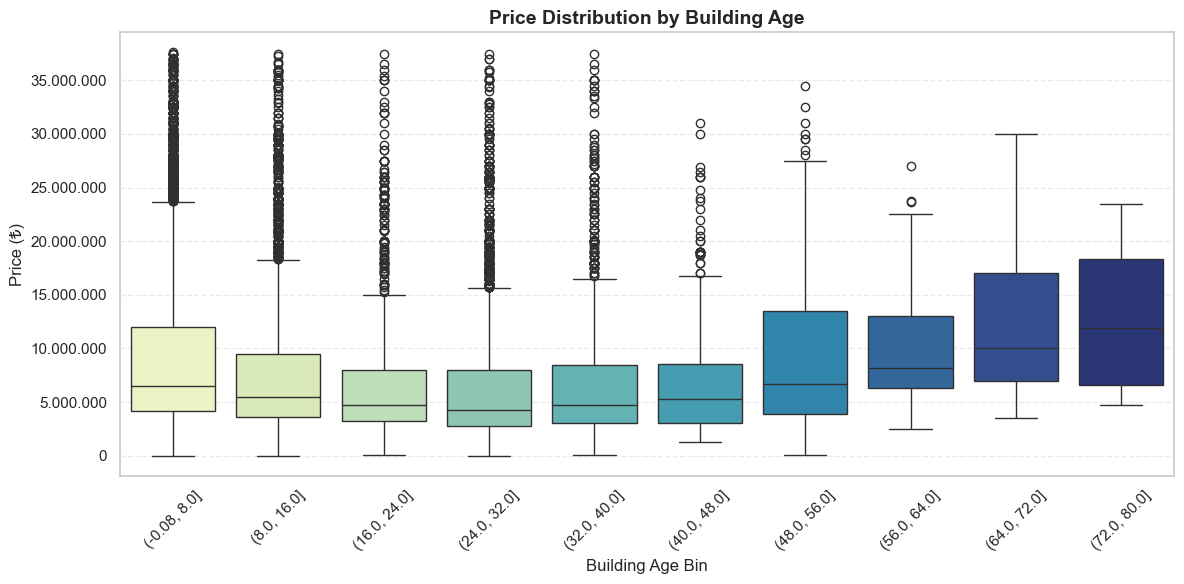

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Bina Yaşı Bin oluştur
df['Building Age Bin'] = pd.cut(df['Bina Yaşı'], bins=10)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Building Age Bin", y="Fiyat", data=df, palette="YlGnBu")

# Başlık ve eksenler
plt.title("Price Distribution by Building Age", fontsize=14, weight="bold")
plt.xlabel("Building Age Bin")
plt.ylabel("Price (₺)")

# TL formatı
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", ".")))

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



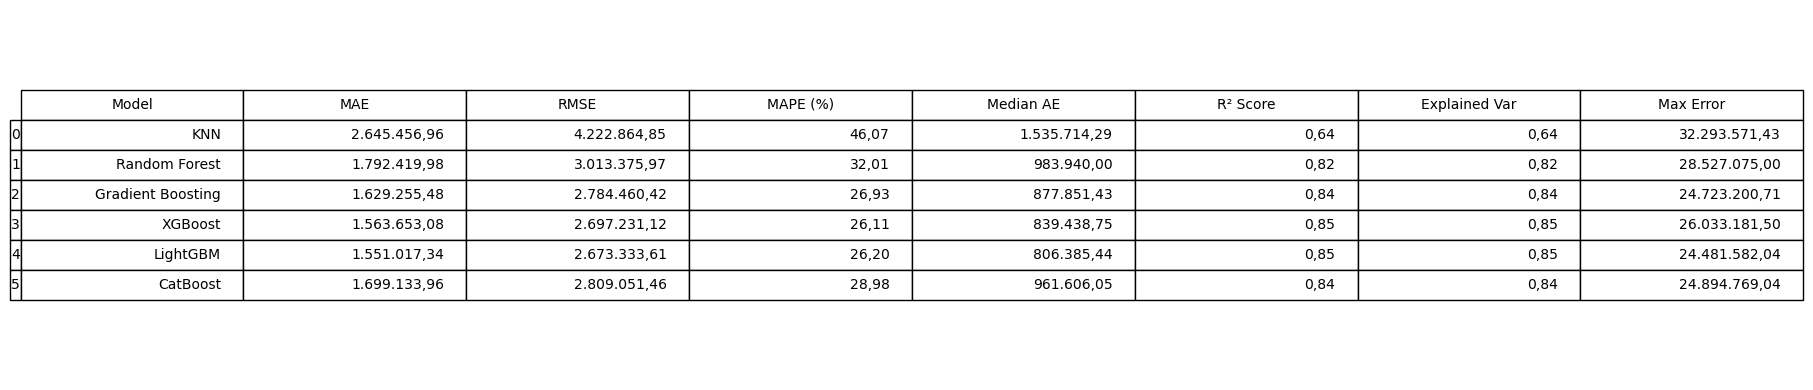

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriler
data = {
    "Model": ["KNN", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"],
    "MAE": [2645456.96, 1792419.98, 1629255.48, 1563653.08, 1551017.34, 1699133.96],
    "RMSE": [4222864.85, 3013375.97, 2784460.42, 2697231.12, 2673333.61, 2809051.46],
    "MAPE (%)": [46.07, 32.01, 26.93, 26.11, 26.20, 28.98],
    "Median AE": [1535714.29, 983940.00, 877851.43, 839438.75, 806385.44, 961606.05],
    "R² Score": [0.64, 0.82, 0.84, 0.85, 0.85, 0.84],
    "Explained Var": [0.64, 0.82, 0.84, 0.85, 0.85, 0.84],
    "Max Error": [32293571.43, 28527075.00, 24723200.71, 26033181.50, 24481582.04, 24894769.04]
}

df = pd.DataFrame(data)

# Nokta-virgül biçimlendirici
def format_tr(val):
    if isinstance(val, (float, int)):
        return f"{val:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    return val

# Görselleştirme ve tablo
fig, ax = plt.subplots(figsize=(18, 4))
ax.axis("off")
formatted_df = df.copy()
for col in df.columns[1:]:
    formatted_df[col] = df[col].map(format_tr)

tbl = pd.plotting.table(ax, formatted_df, loc="center", colWidths=[0.12] * len(df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.5)

# Kaydetme (isteğe bağlı)
plt.tight_layout()
plt.savefig("satilik_model_karsilastirma_tablosu.png", dpi=300)
plt.show()



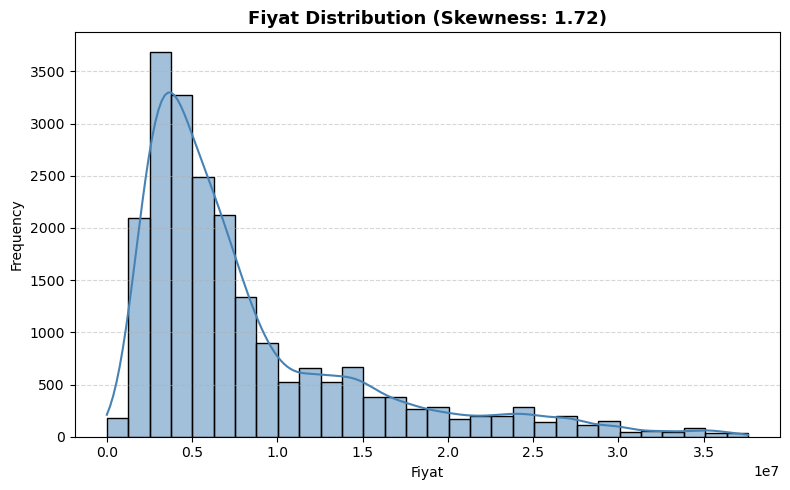

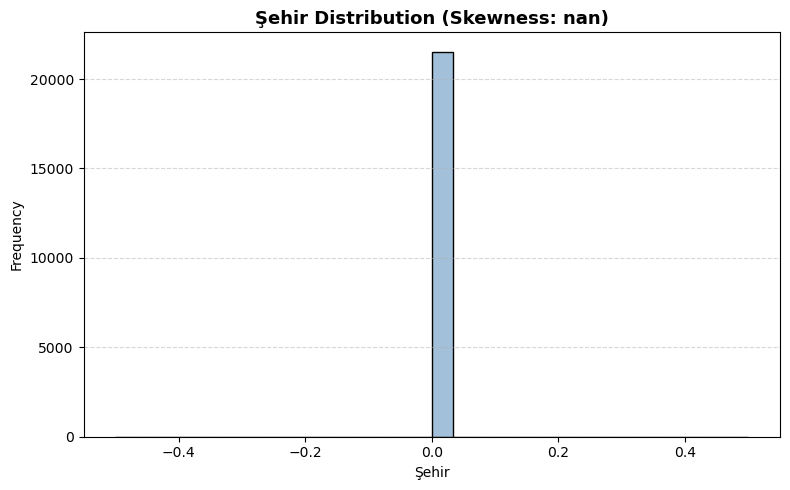

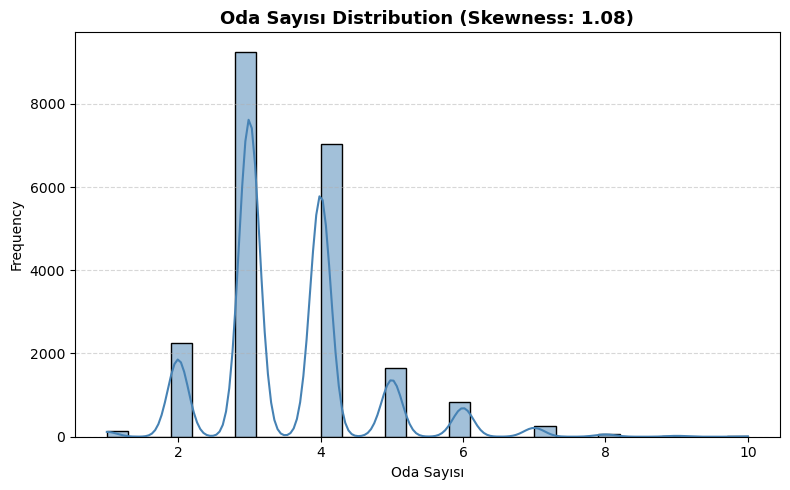

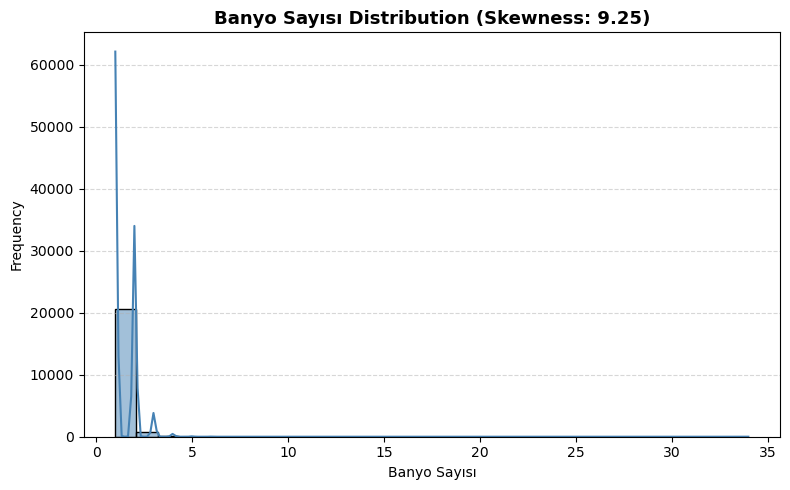

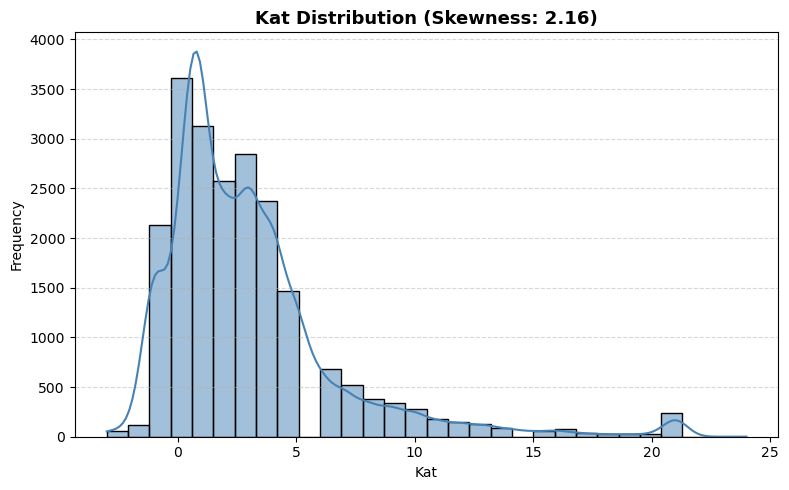

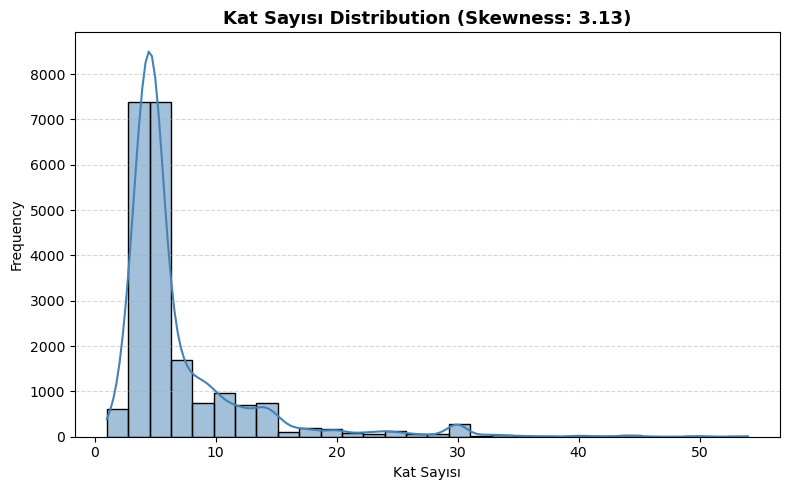

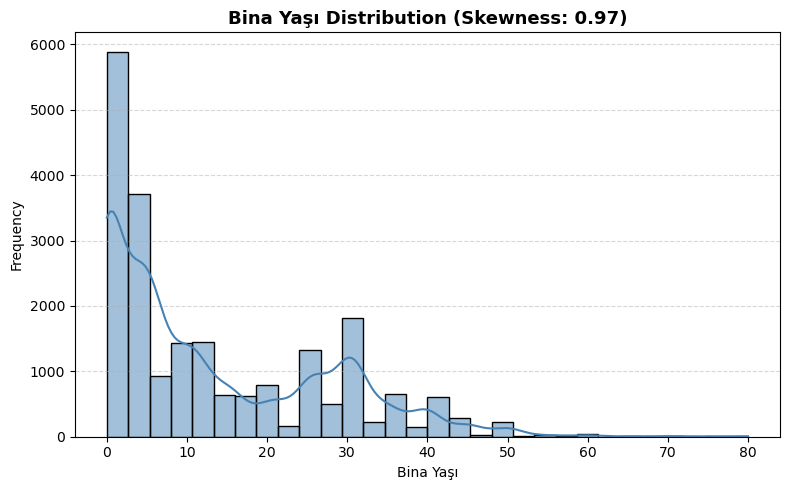

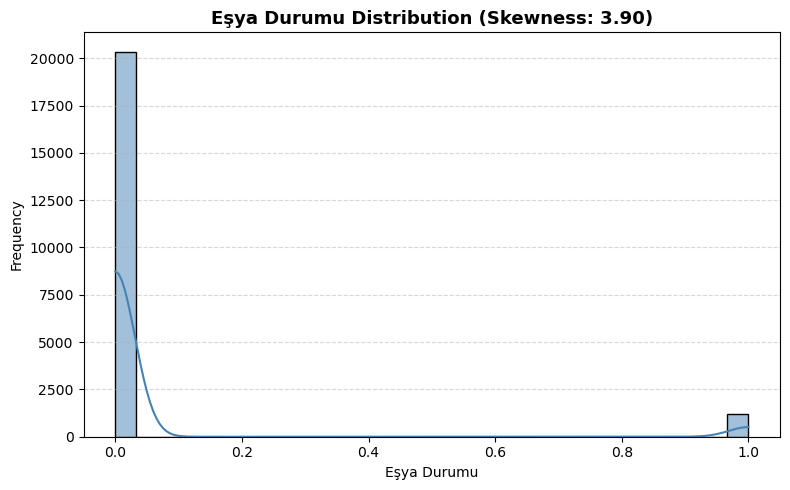

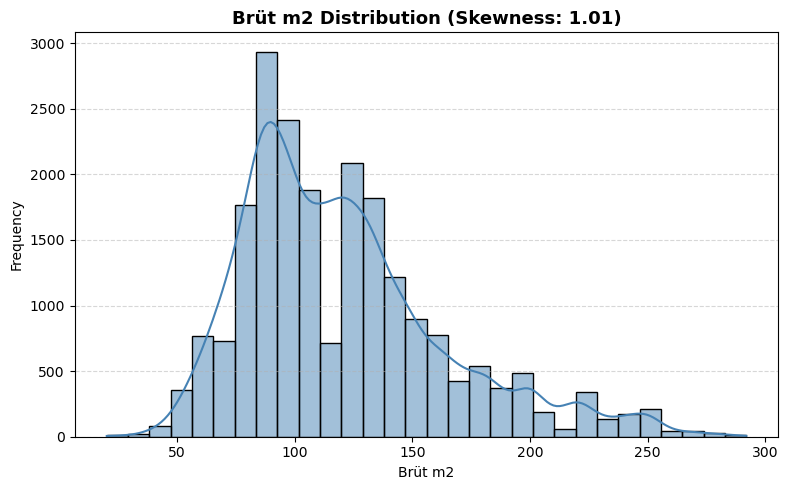

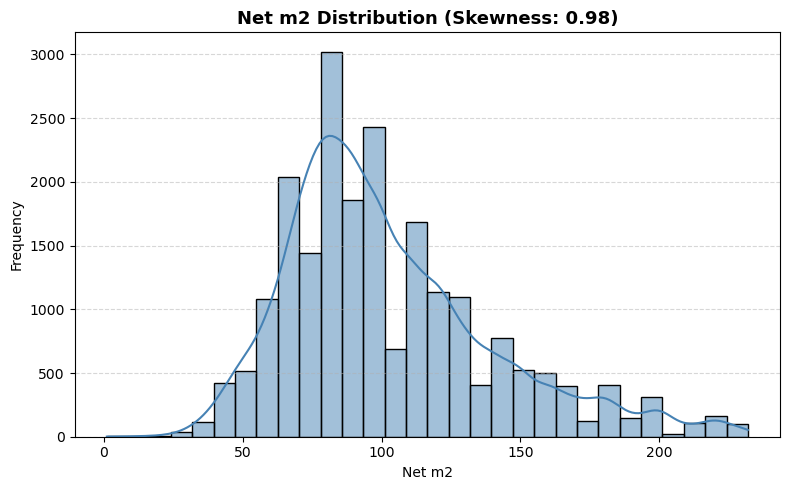

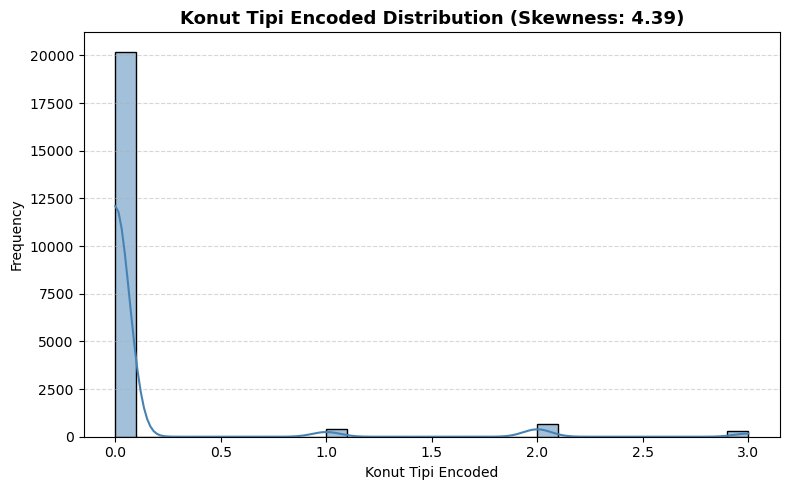

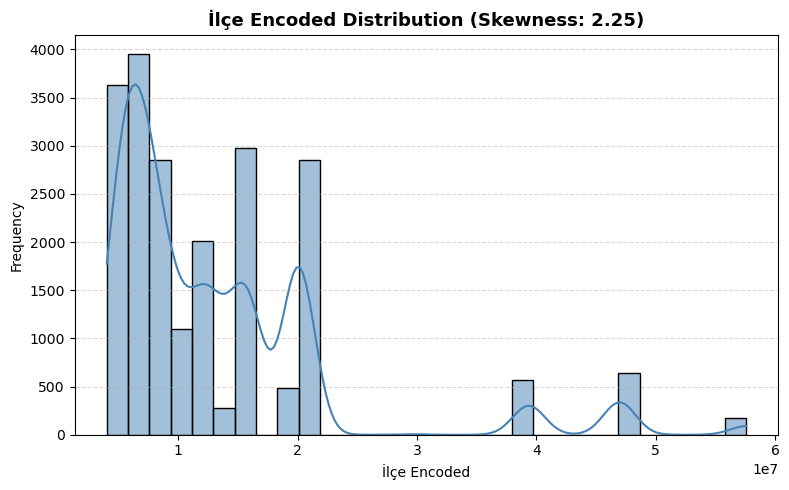

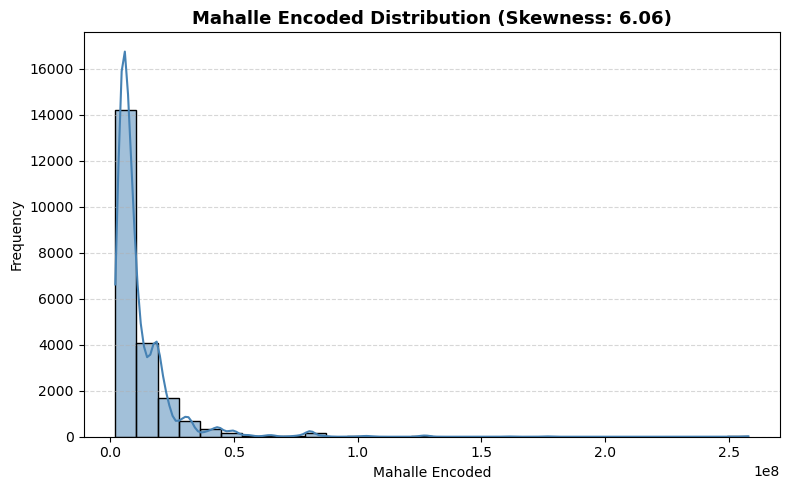

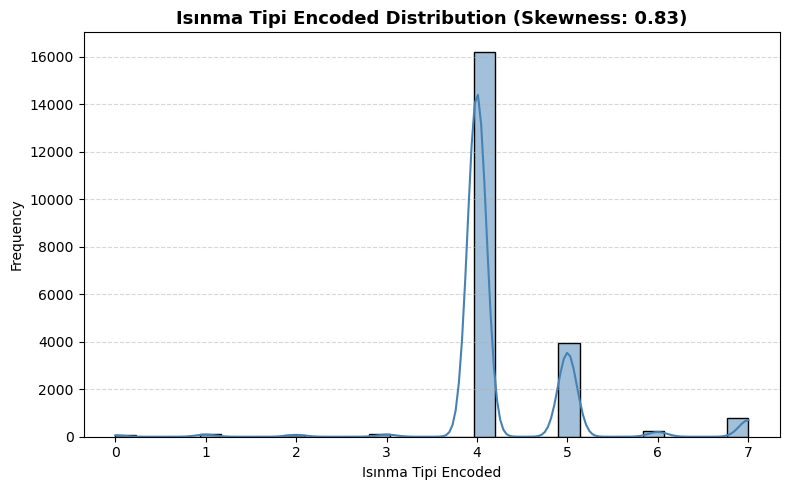

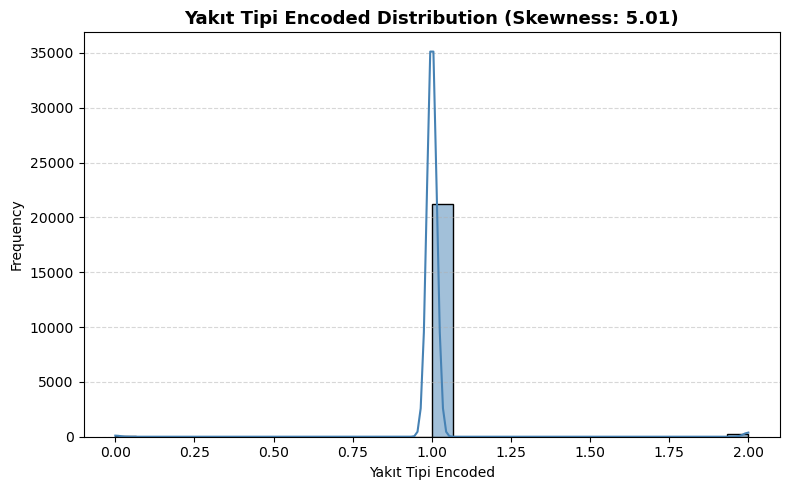

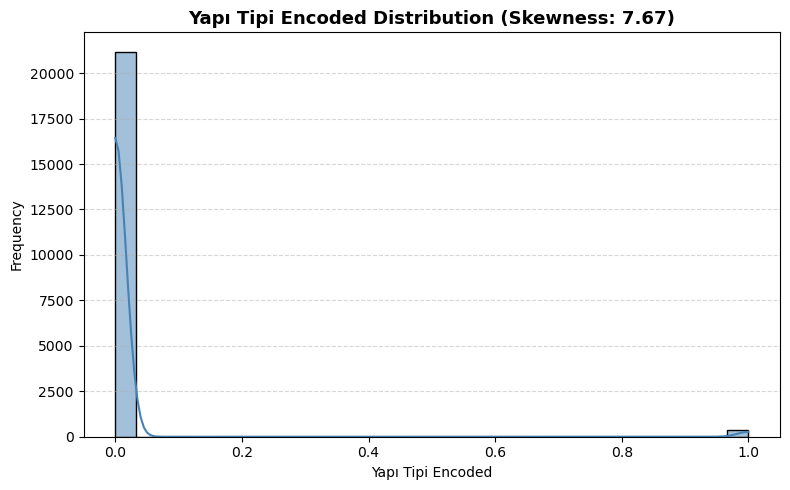

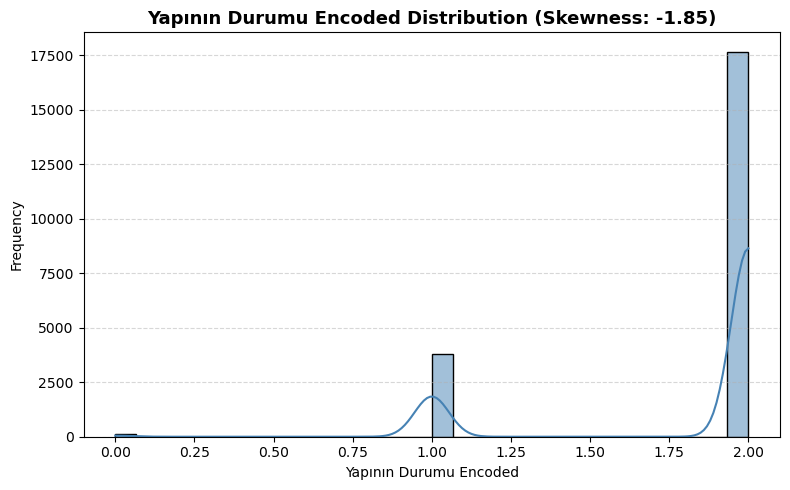

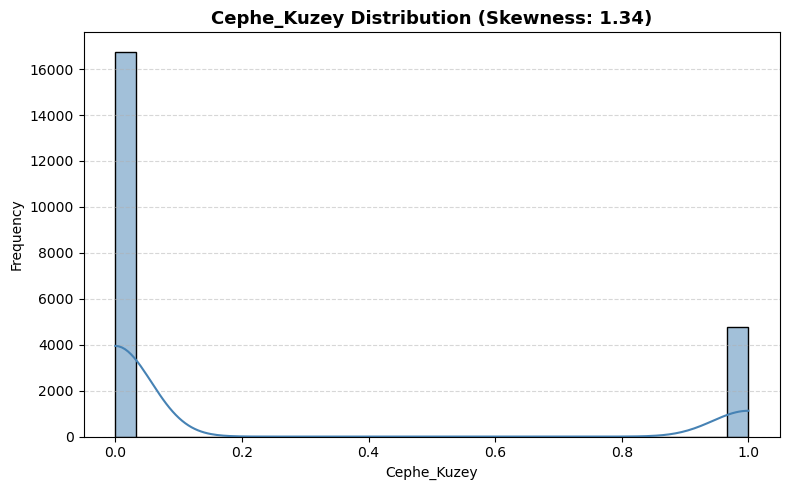

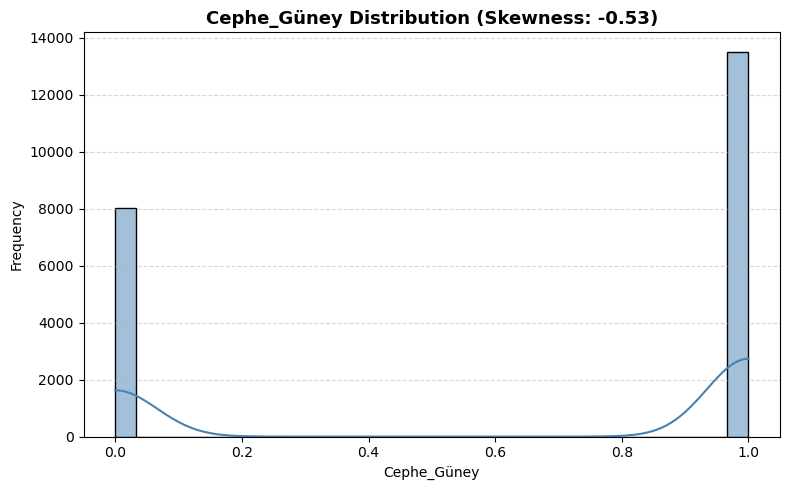

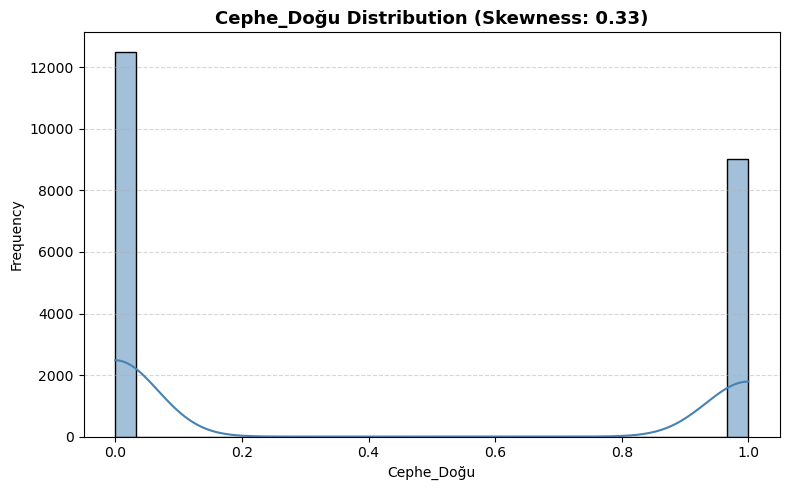

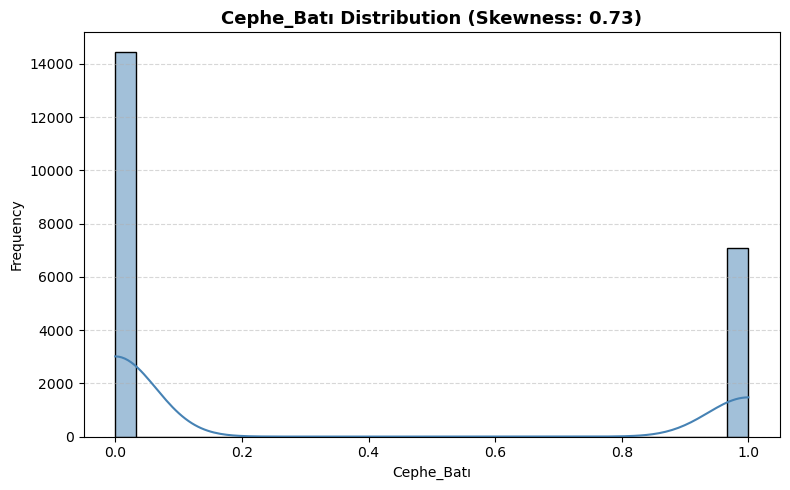

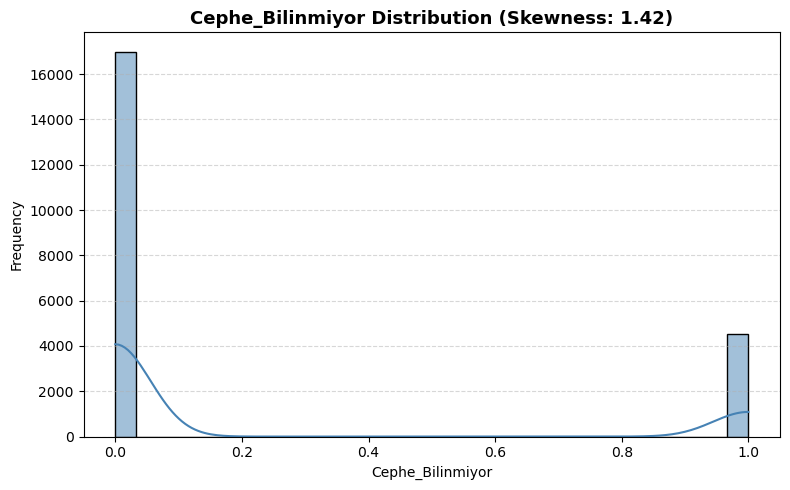

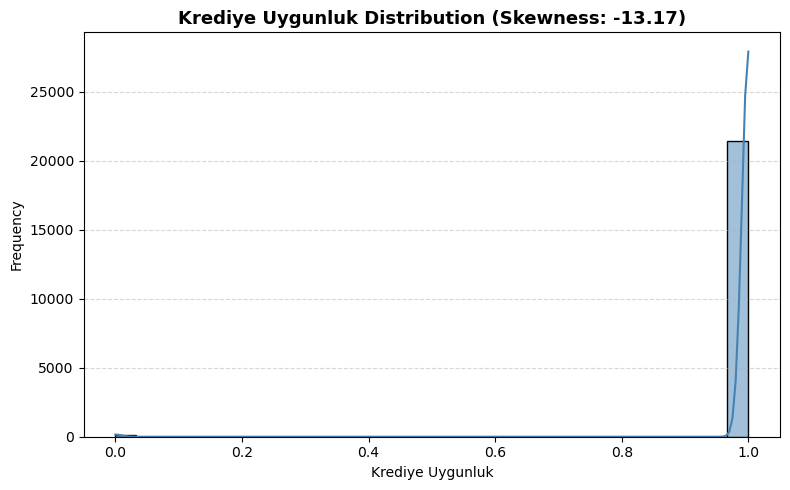

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Veri setini yükle
df = pd.read_csv("satılıkpreprocessing.csv", encoding="utf-8-sig")

# Sayısal değişkenleri otomatik seç
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Histogramlar ve çarpıklık (skewness) değerleri
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, color="steelblue", bins=30)
    skewness = skew(df[col].dropna())
    plt.title(f"{col} Distribution (Skewness: {skewness:.2f})", fontsize=13, weight="bold")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


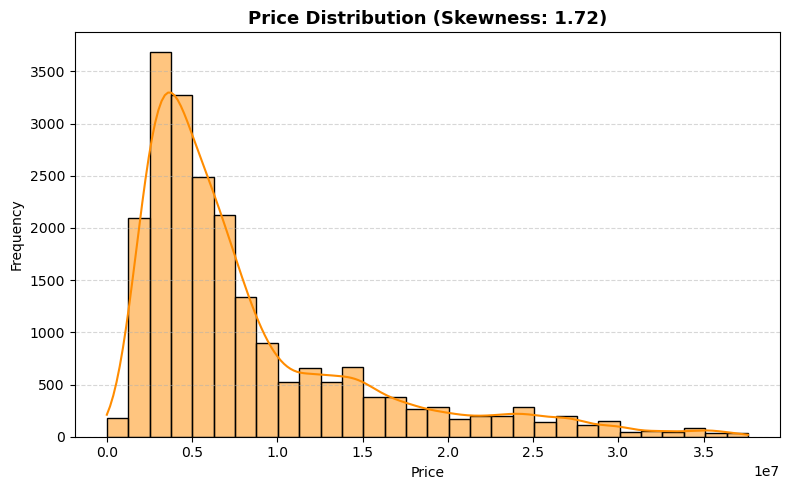

In [4]:
# Sadece hedef değişken için
plt.figure(figsize=(8, 5))
sns.histplot(df["Fiyat"].dropna(), kde=True, bins=30, color="darkorange")
plt.title(f"Price Distribution (Skewness: {skew(df['Fiyat'].dropna()):.2f})", fontsize=13, weight="bold")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


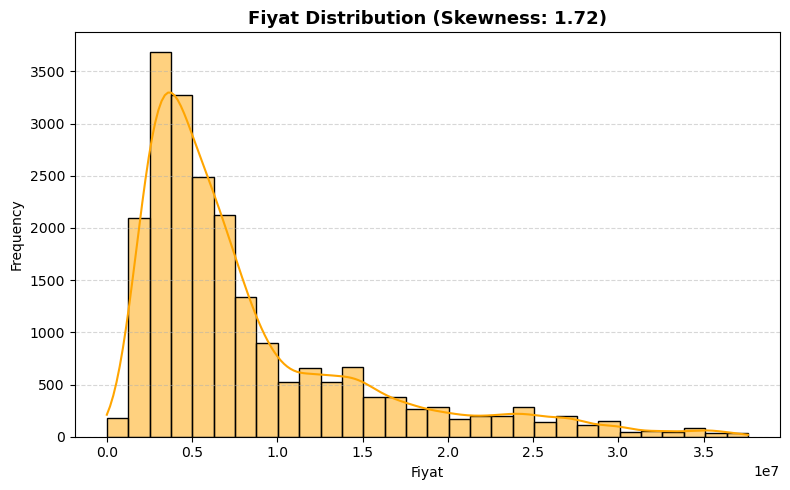

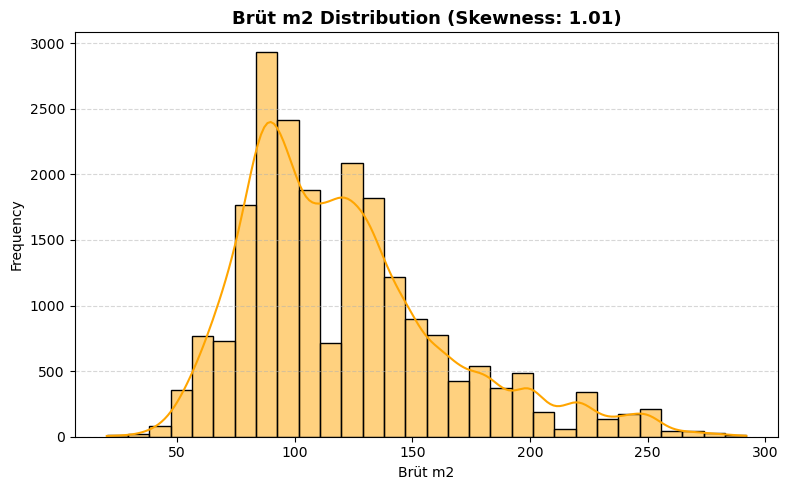

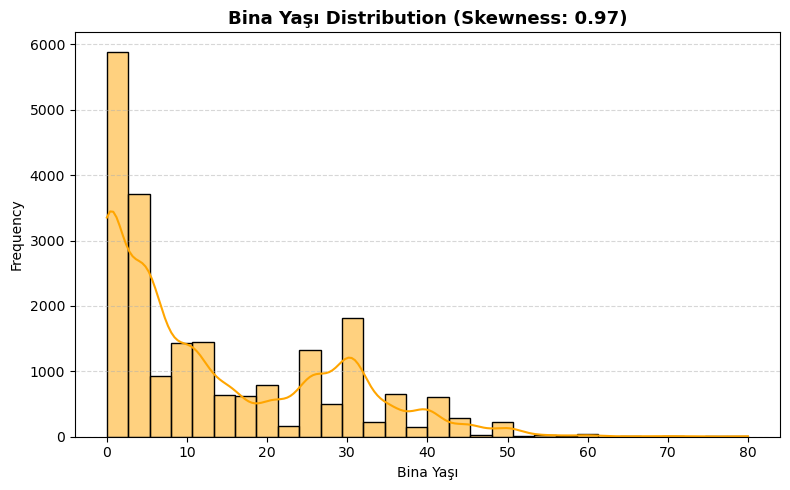

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Veri yükle
df = pd.read_csv("satılıkpreprocessing.csv", encoding="utf-8-sig")

# Sayısal değişkenleri seç
numerical_cols = ['Fiyat', 'Brüt m2', 'Bina Yaşı']  # örnek: senin değişkenlerine göre uyarlayabilirsin

# Her bir değişken için histogram çiz
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='orange')
    skewness = skew(df[col].dropna())
    plt.title(f"{col} Distribution (Skewness: {skewness:.2f})", fontsize=13, weight="bold")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

C:\Users\bedir\AppData\Local\Temp\ipykernel_19076\4246793124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


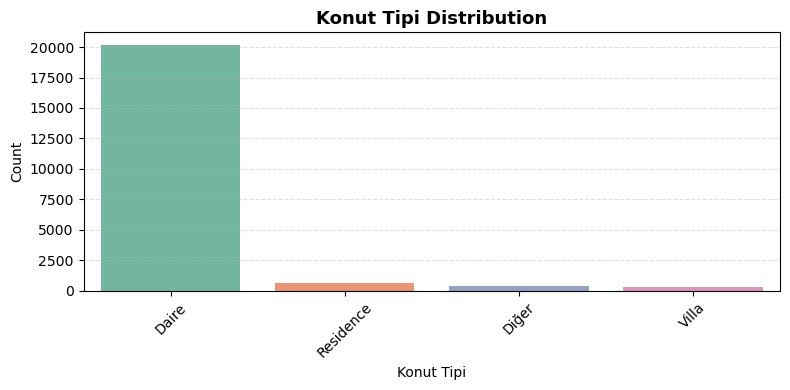

C:\Users\bedir\AppData\Local\Temp\ipykernel_19076\4246793124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


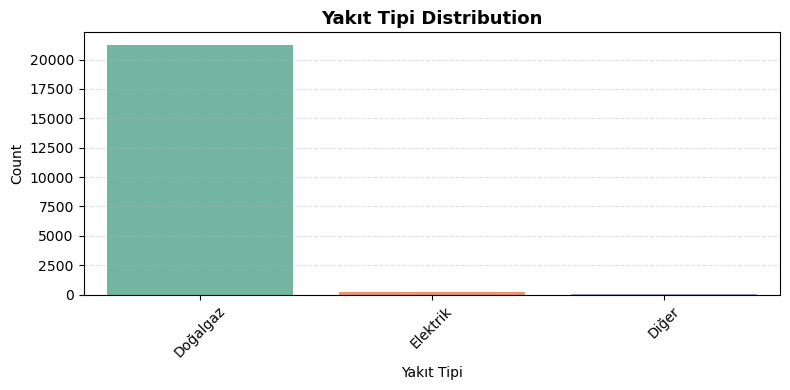

C:\Users\bedir\AppData\Local\Temp\ipykernel_19076\4246793124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


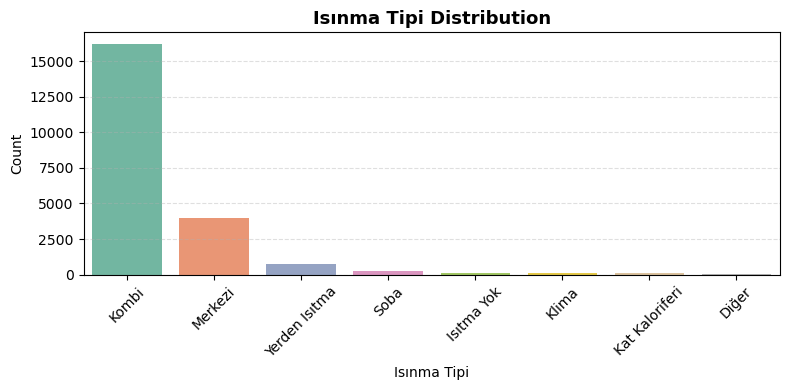

In [8]:
# Kategorik değişkenler örnek
categorical_cols = ['Konut Tipi', 'Yakıt Tipi', 'Isınma Tipi']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette="Set2")
    plt.title(f"{col} Distribution", fontsize=13, weight="bold")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


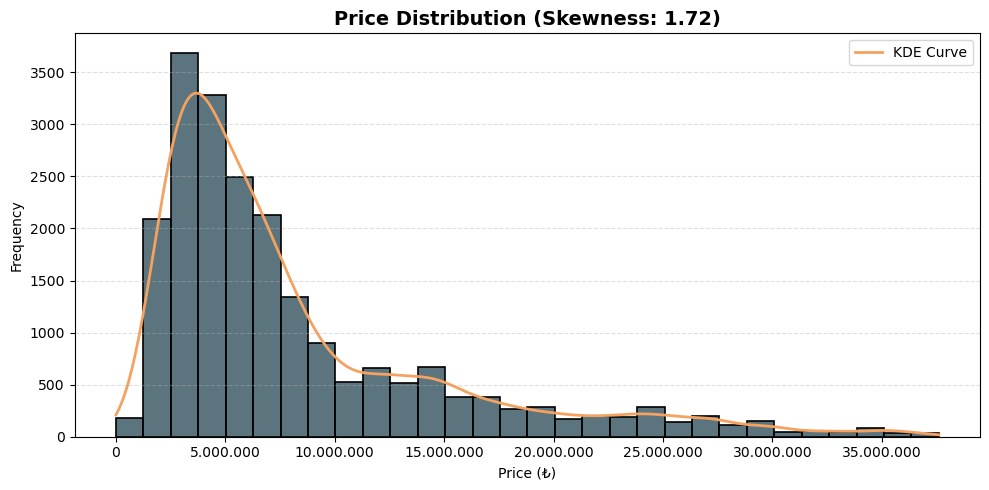

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import gaussian_kde

# Veriyi temizle
data = df["Fiyat"].dropna()

# Renkler
bar_color = "#264653"     # Koyu mavi
kde_color = "#f4a261"     # Turuncu

# KDE eğrisi için
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 500)
kde_vals = kde(x_vals)

# Grafik
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, color=bar_color, edgecolor="black", linewidth=1.2)

plt.plot(x_vals, kde_vals * len(data) * (data.max() - data.min()) / 30,  # Y ölçeğini histogramla eşleştir
         color=kde_color, linewidth=2, label="KDE Curve")

skewness = skew(data)
plt.title(f"Price Distribution (Skewness: {skewness:.2f})", fontsize=14, weight="bold")
plt.xlabel("Price (₺)")
plt.ylabel("Frequency")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.grid(axis='y', linestyle="--", alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()



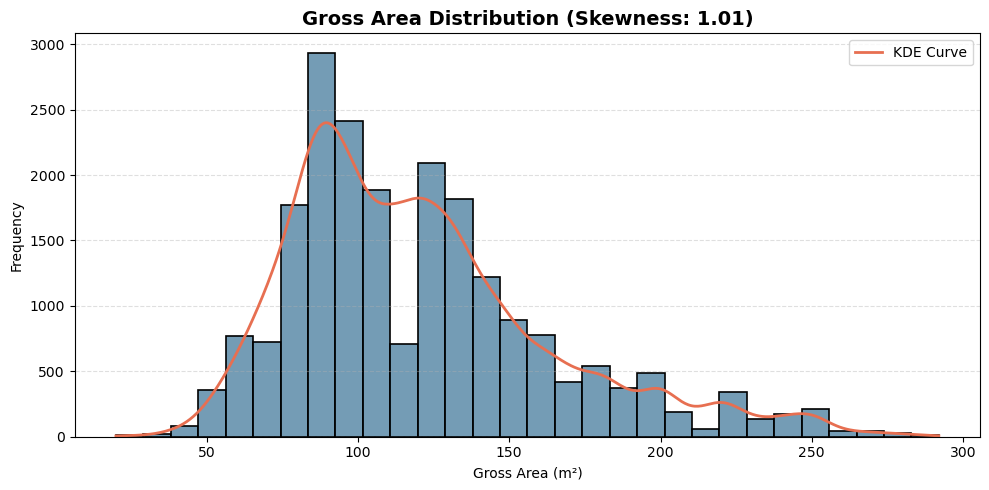

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, gaussian_kde
import numpy as np

# Kolon adı
col = "Brüt m2"
data = df[col].dropna()
skewness = skew(data)

# 🎨 Renkler
bar_color = "#457b9d"   # Histogram için mavi ton
kde_color = "#e76f51"   # KDE eğrisi için kırmızımsı

# KDE eğrisi hesaplama
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 500)
kde_vals = kde(x_vals)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, color=bar_color, edgecolor="black", linewidth=1.2)

# KDE çizimi
plt.plot(x_vals, kde_vals * len(data) * (data.max() - data.min()) / 30,  # Ölçek uyumu
         color=kde_color, linewidth=2, label="KDE Curve")

# Etiketler ve başlık
plt.title(f"Gross Area Distribution (Skewness: {skewness:.2f})", fontsize=14, weight="bold")
plt.xlabel("Gross Area (m²)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle="--", alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()


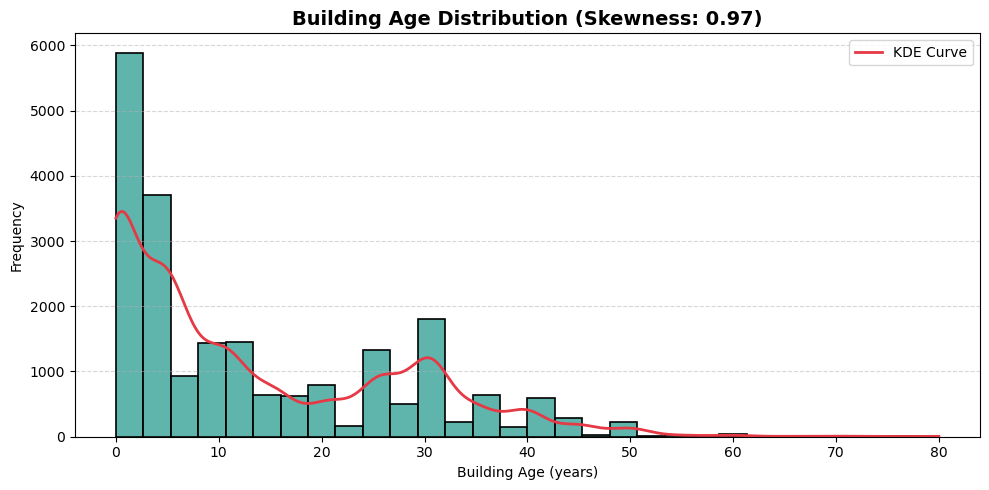

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, gaussian_kde
import numpy as np

# Değişken
col = "Bina Yaşı"
data = df[col].dropna()
skewness = skew(data)

# 🎨 Renkler
bar_color = "#2a9d8f"   # Histogram için yeşilimsi
kde_color = "#e63946"   # KDE eğrisi için kırmızı ton

# KDE eğrisi
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 500)
kde_vals = kde(x_vals)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, color=bar_color, edgecolor="black", linewidth=1.2)

# KDE eğrisi (ölçeklenmiş)
plt.plot(x_vals, kde_vals * len(data) * (data.max() - data.min()) / 30, color=kde_color, linewidth=2, label="KDE Curve")

# Başlık ve etiketler
plt.title(f"Building Age Distribution (Skewness: {skewness:.2f})", fontsize=14, weight="bold")
plt.xlabel("Building Age (years)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_21048\1282297357.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


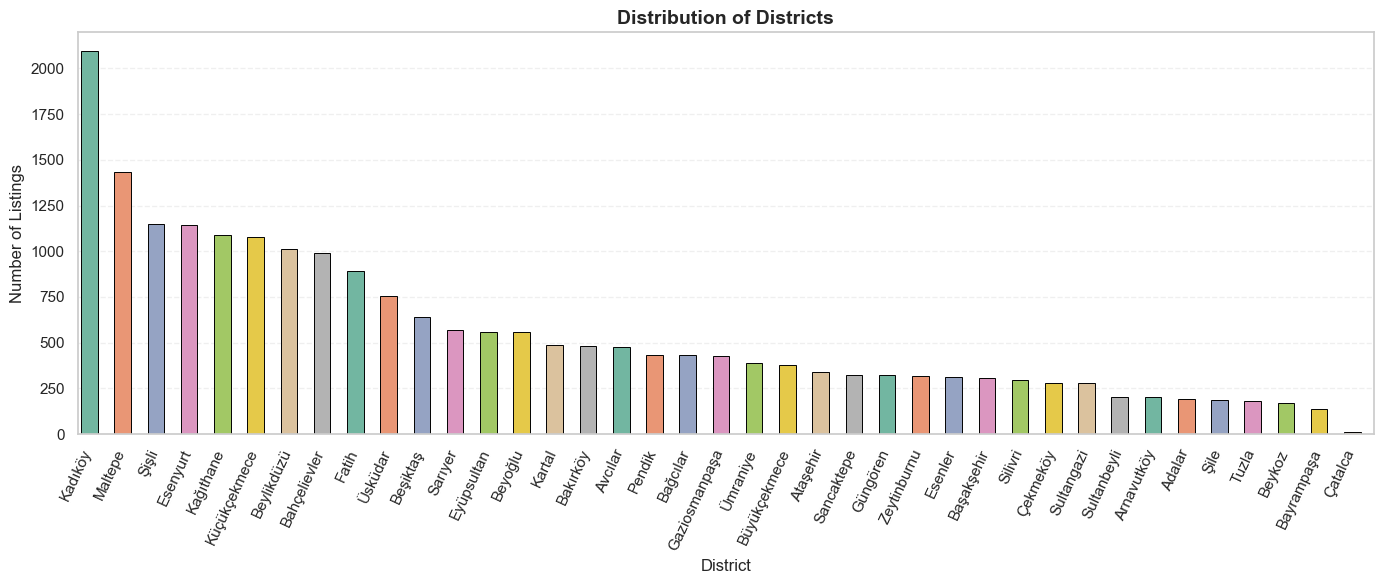

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stil ve boyut
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# 📊 Barplot (bar genişliği düşürüldü)
ax = sns.countplot(
    data=df,
    x="İlçe",
    order=df["İlçe"].value_counts().index,
    palette="Set2",  # pastel yerine daha doygun görünüm
    edgecolor="black",
    linewidth=0.7
)

# 🎨 Başlık ve etiketler
plt.title("Distribution of Districts", fontsize=14, weight="bold")
plt.xlabel("District")
plt.ylabel("Number of Listings")
plt.xticks(rotation=65, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.3)

# 🛠 Barlar arasını açmak için bar genişliği küçültülür
for bar in ax.patches:
    bar.set_width(0.5)

plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_21048\1685878486.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


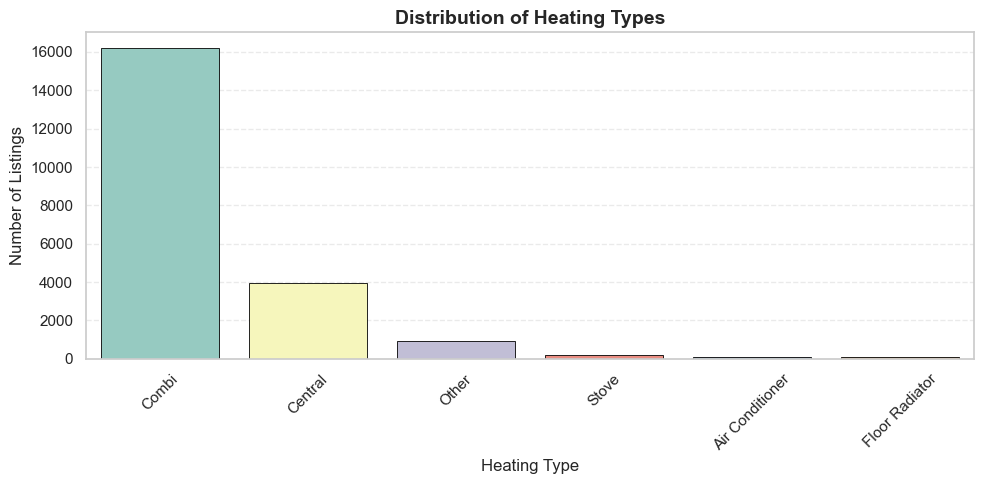

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Normalize: Küçük harf + boşluk temizliği
df["Isınma Tipi Normalized"] = df["Isınma Tipi"].str.lower().str.strip()

# 📌 Mapping dictionary
heating_map = {
    "kombi": "Combi",
    "merkezi": "Central",
    "soba": "Stove",
    "yerden ısıtma": "Underfloor Heating",
    "klima": "Air Conditioner",
    "ısıtma yok": "No Heating",
    "kat kaloriferi": "Floor Radiator",
    "fancoil ünitesi": "Fan Coil Unit",
    "diğer": "Other"
}

# 🌐 İngilizceye çevir + bilinmeyenlere "Other"
df["Heating Type (EN)"] = df["Isınma Tipi Normalized"].map(heating_map)
df["Heating Type (EN)"] = df["Heating Type (EN)"].fillna("Other")

# 📊 Barplot
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.countplot(
    data=df,
    x="Heating Type (EN)",
    order=df["Heating Type (EN)"].value_counts().index,
    palette="Set3",
    edgecolor="black",
    linewidth=0.6
)
plt.title("Distribution of Heating Types", fontsize=14, weight="bold")
plt.xlabel("Heating Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_21048\712353672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


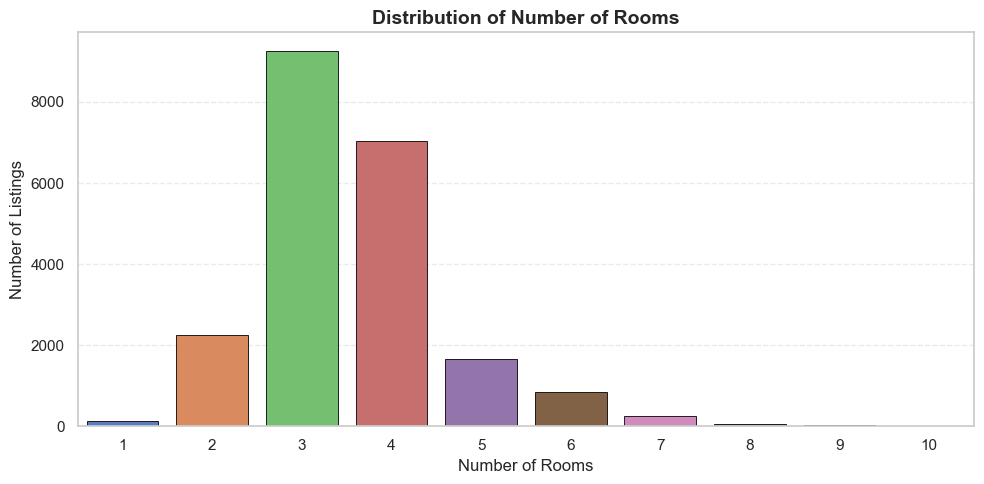

In [22]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.countplot(
    data=df,
    x="Oda Sayısı",
    order=sorted(df["Oda Sayısı"].unique()),
    palette="muted",
    edgecolor="black",
    linewidth=0.6
)
plt.title("Distribution of Number of Rooms", fontsize=14, weight="bold")
plt.xlabel("Number of Rooms")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
